In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline
%matplotlib qt
# %matplotlib osx


sns.set_style("whitegrid")
sns.set_style("ticks")
from datetime import datetime
str(datetime.now())




'2018-10-12 17:41:00.514501'

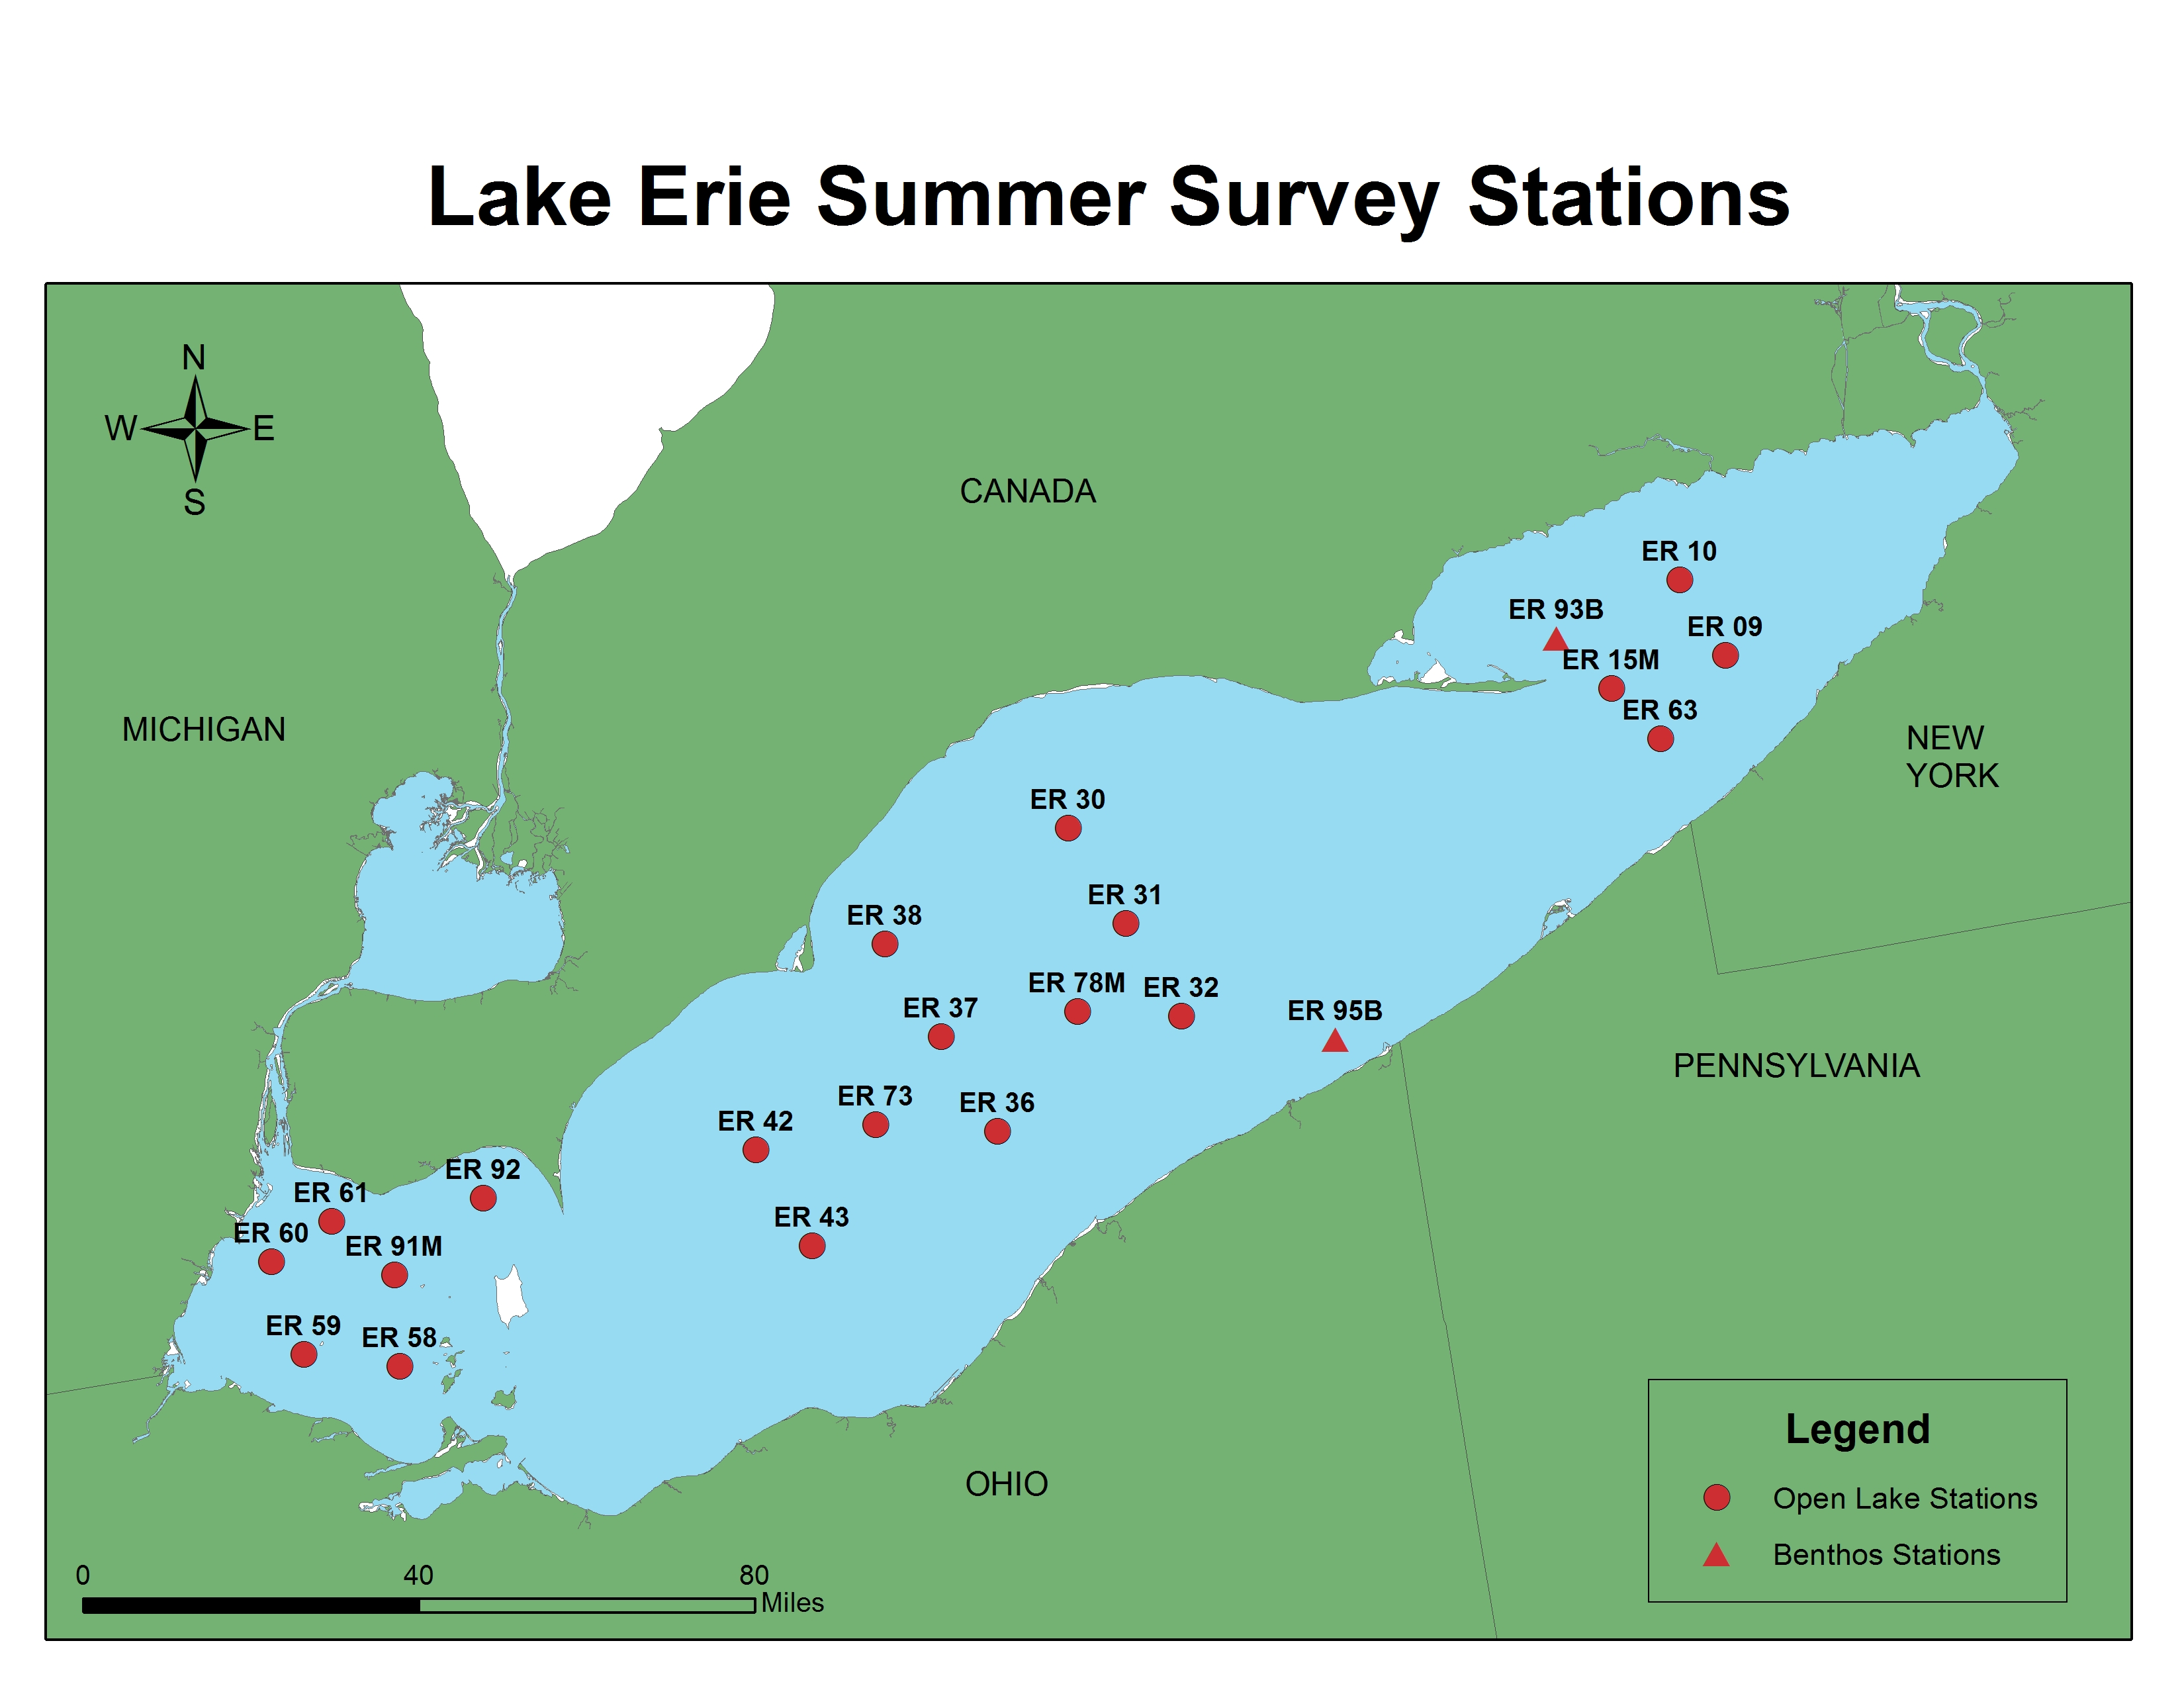

In [2]:
from IPython.display import Image
Image(filename='../../measurements/GLNPO/Erie_Summer_Survey2017.jpg') 

In [19]:
Cl = pd.read_csv('../../measurements/GLNPO/Mass Balance/Cl.csv')
Cl = Cl[Cl.QC_TYPE=='routine field sample']

In [25]:
Cl[Cl.YEAR>1999].groupby(['STATION_ID']).count().sort_values(['Row'],ascending=False)

,Row,YEAR,MONTH,SEASON,LAKE,CRUISE_ID,VISIT_ID,STN_DEPTH_M,LATITUDE,LONGITUDE,...,METHOD_1,RESULT_REMARK_1,ANL_CODE_2,ANALYTE_2,VALUE_2,UNITS_2,FRACTION_2,METHOD_2,RESULT_REMARK_2,Unnamed: 33
STATION_ID,,,,,,,,,,,,,,,,,,,,,
ER15M,352,352,352,352,352,352,352,352,352,352,...,352,0,0,0,0,0,0,0,0,0
ER78M,229,229,229,229,229,229,229,229,229,229,...,229,10,0,0,0,0,0,0,0,0
ER09,206,206,206,206,206,206,206,206,206,206,...,206,0,0,0,0,0,0,0,0,0
ER63,202,202,202,202,202,202,202,202,202,202,...,202,0,0,0,0,0,0,0,0,0
ER10,198,198,198,198,198,198,198,198,198,198,...,198,1,0,0,0,0,0,0,0,0
ER38,179,179,179,179,179,179,179,179,179,179,...,179,6,0,0,0,0,0,0,0,0
ER37,171,171,171,171,171,171,171,171,171,171,...,171,5,0,0,0,0,0,0,0,0
ER42,171,171,171,171,171,171,171,171,171,171,...,171,6,0,0,0,0,0,0,0,0
ER30,170,170,170,170,170,170,170,170,170,170,...,170,6,0,0,0,0,0,0,0,0


In [7]:
deep_stations = ['ER15M','ER78M','ER91M']
years = range(2003,2018)
seasons = ['Spring', 'Summer']

In [8]:
Cl = Cl[Cl['STATION_ID'].isin(deep_stations)]
Cl = Cl[Cl['STATION_ID'].isin(deep_stations)]
Cl = Cl[Cl['SEASON'].isin(seasons)]
Cl['VALUE_1'] = pd.to_numeric(Cl['VALUE_1'], errors='coerce')

In [9]:
Cl = Cl.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()

In [10]:
Cl[(Cl.YEAR==2011) & (Cl.STATION_ID=='ER15M') & (Cl.SEASON=='Spring')]

,STATION_ID,YEAR,SEASON,SAMPLE_DEPTH_M,VALUE_1
538,ER15M,2011,Spring,2.0,6.993
539,ER15M,2011,Spring,4.9,7.009
540,ER15M,2011,Spring,10.0,7.016
541,ER15M,2011,Spring,20.0,7.020
542,ER15M,2011,Spring,30.1,7.065
543,ER15M,2011,Spring,40.1,7.015
544,ER15M,2011,Spring,52.2,7.011
545,ER15M,2011,Spring,61.1,7.017


In [11]:
Cl = Cl.drop(Cl[(Cl.YEAR==2011) & (Cl.STATION_ID=='ER15M') & (Cl.SEASON=='Spring')].index)

In [12]:
Cl[Cl.YEAR>1999].groupby(['STATION_ID','SEASON']).describe()['VALUE_1'].applymap('{:.1f}'.format)

count  mean  std   min   25%   50%   75%   max
STATION_ID SEASON                                                
ER15M      Spring  153.0  17.4  0.8  15.6  16.9  17.5  18.1  18.4
           Summer  153.0  17.4  0.9  14.8  16.8  17.6  18.0  19.6
ER78M      Spring   86.0  16.6  1.1  14.5  16.2  16.6  17.1  19.1
           Summer  113.0  16.5  0.9  12.6  16.0  16.5  17.0  18.9
ER91M      Spring   67.0  15.9  5.1   9.4  12.1  14.1  20.1  26.2
           Summer   63.0  11.5  2.0   8.8  10.2  10.9  12.2  17.3

In [13]:
# %matplotlib notebook
# %matplotlib
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = Cl[(Cl['STATION_ID']==st) & 
                      (Cl['YEAR']==y) &
                    (Cl['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]), fontsize='small')
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].set_xlim(0,30)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Chloride concnetrations, [$mg$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# plt.draw()
# f.savefig('Mass Balance/GLENDA/Chloride_mgL_0_30.pdf')

Text(8.5,-0.2,'Chloride concnetrations, [$mg$ $L^{-1}$]')

In [14]:
Temp = pd.read_csv('../../measurements/GLNPO/Mass Balance/Temp.csv')
Temp = Temp[Temp.QC_TYPE=='routine field sample']
Temp = Temp[Temp['STATION_ID'].isin(deep_stations)]
Temp = Temp[Temp['STATION_ID'].isin(deep_stations)]
Temp = Temp[Temp['SEASON'].isin(seasons)]
Temp['VALUE_1'] = pd.to_numeric(Temp['VALUE_1'], errors='coerce')
Temp = Temp[Temp['VALUE_1']>0.1]
Temp = Temp.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (37,38,44,45,47,48,50,51,54,55,57,58,61,62,64,65,68,69,71,72,75,76,78,79,82,83,85,86,89,90,92,93,96,97,99,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = Temp[(Temp['STATION_ID']==st) & 
                      (Temp['YEAR']==y) &
                    (Temp['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].set_xlim(0,30)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(7,-0.2, 'Temperature, [C]', fontsize=24, transform=axes[2][0].transAxes)
# f.savefig('Temperature_C.pdf')

Text(7,-0.2,'Temperature, [C]')

In [11]:
Alk = pd.read_csv('../../measurements/GLNPO/Mass Balance/Alk.csv')
Alk = Alk[Alk.QC_TYPE=='routine field sample']
Alk = Alk[Alk['STATION_ID'].isin(deep_stations)]
Alk = Alk[Alk['STATION_ID'].isin(deep_stations)]
Alk = Alk[Alk['SEASON'].isin(seasons)]
Alk['VALUE_1'] = pd.to_numeric(Alk['VALUE_1'], errors='coerce')
Alk = Alk[Alk['VALUE_1']>50]
Alk = Alk.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()

Text(8.5,-0.2,'Total alkalinity as $CaCO_3$, [$mg$ $L^{-1}$]')

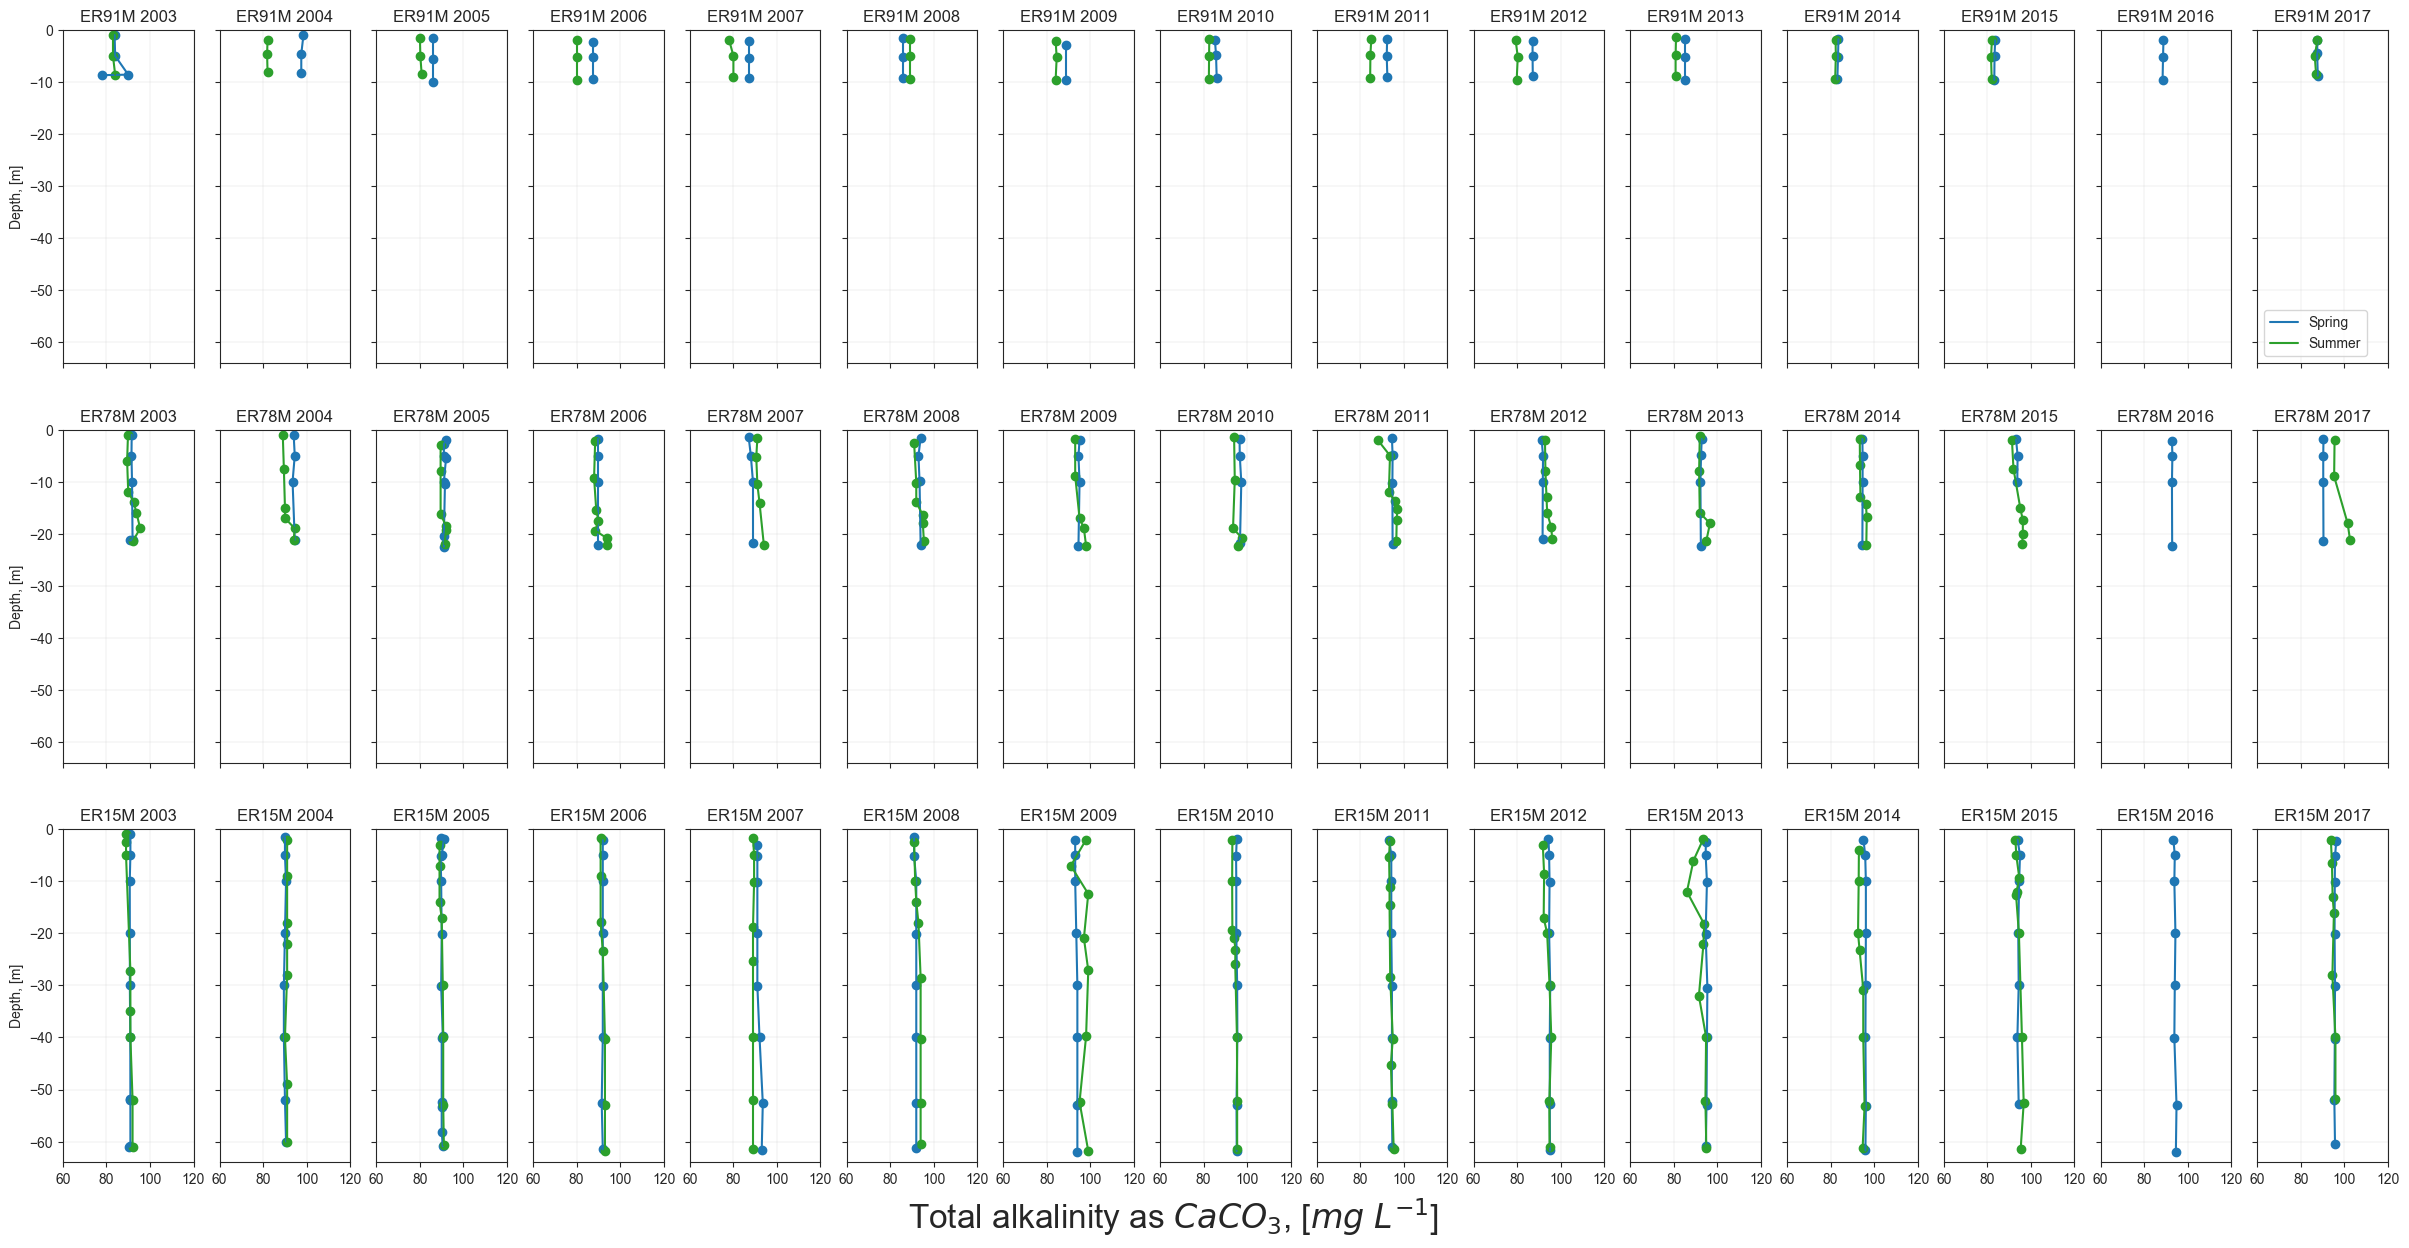

In [12]:
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = Alk[(Alk['STATION_ID']==st) & 
                      (Alk['YEAR']==y) &
                    (Alk['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].set_xlim(60,120)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Total alkalinity as $CaCO_3$, [$mg$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('Tot_alkalinity_mgL.pdf')

Text(8.5,-0.2,'pH')

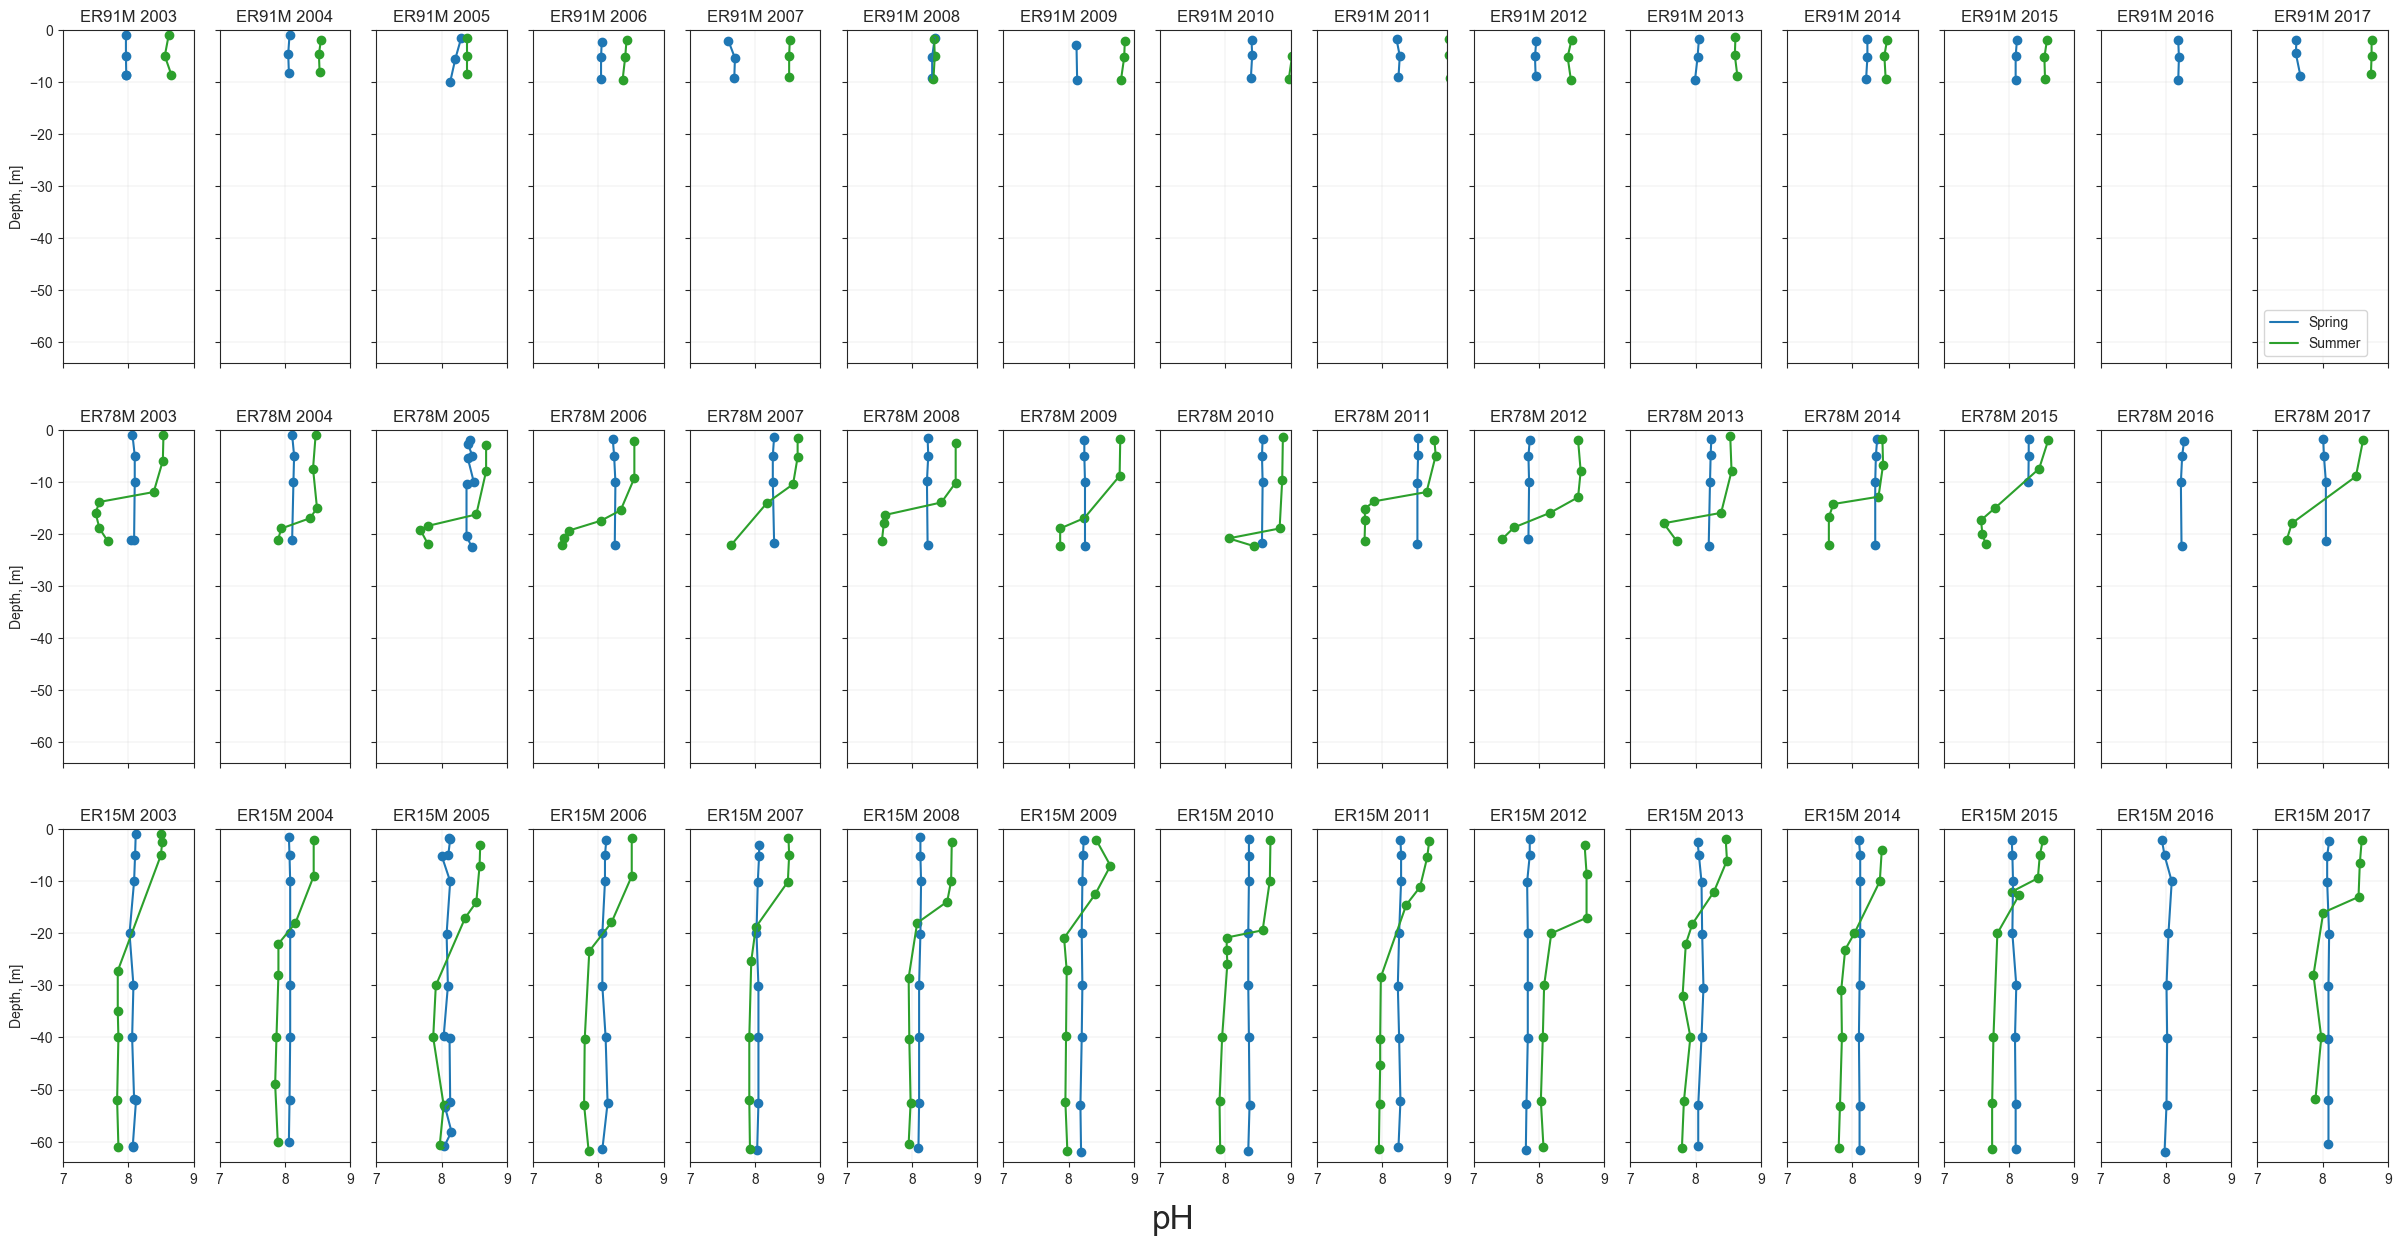

In [13]:
pH = pd.read_csv('../../measurements/GLNPO/Mass Balance/pH.csv')
pH = pH[pH.QC_TYPE=='routine field sample']
pH = pH[pH['STATION_ID'].isin(deep_stations)]
pH = pH[pH['STATION_ID'].isin(deep_stations)]
pH = pH[pH['SEASON'].isin(seasons)]
pH['VALUE_1'] = pd.to_numeric(pH['VALUE_1'], errors='coerce')
# pH = pH[pH['VALUE_1']>50]
pH = pH.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = pH[(pH['STATION_ID']==st) & 
                      (pH['YEAR']==y) &
                    (pH['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].set_xlim(7,9)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'pH', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('pH.pdf')

Text(8.5,-0.2,'Total Phosphorus as P, [$\\mu g$ $L^{-1}$]')

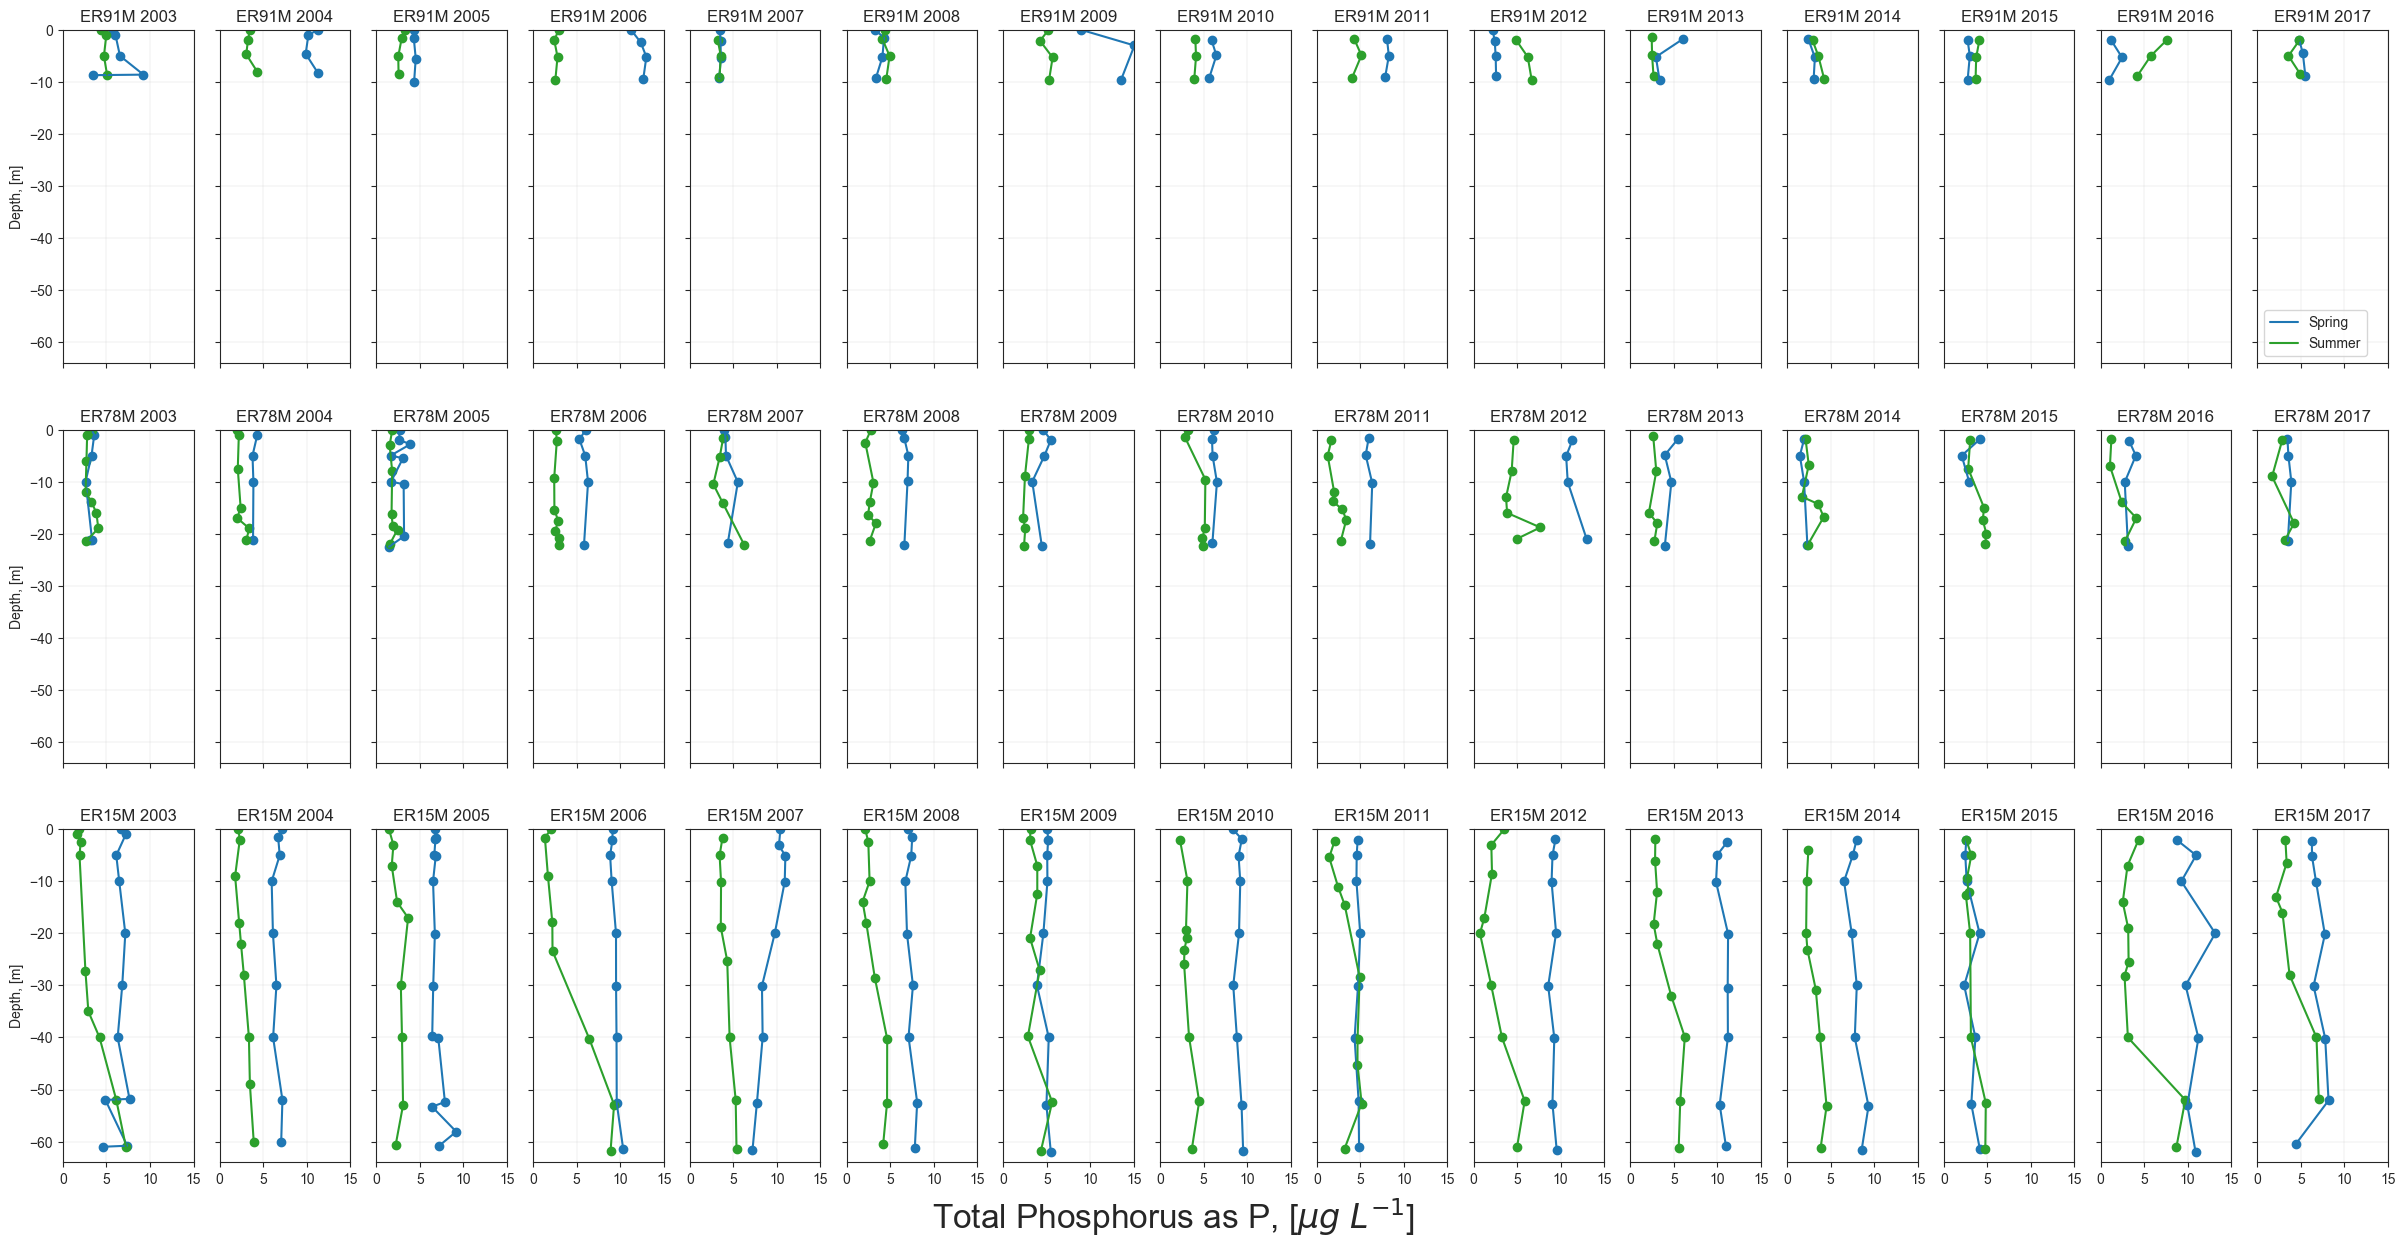

In [14]:
TOTP = pd.read_csv('../../measurements/GLNPO/Mass Balance/TOTP.csv')
TOTP = TOTP[TOTP.QC_TYPE=='routine field sample']
TOTP = TOTP[TOTP['STATION_ID'].isin(deep_stations)]
TOTP = TOTP[TOTP['STATION_ID'].isin(deep_stations)]
TOTP = TOTP[TOTP['SEASON'].isin(seasons)]
TOTP['VALUE_1'] = pd.to_numeric(TOTP['VALUE_1'], errors='coerce')
# TOTP = TOTP[TOTP['VALUE_1']>50]
TOTP = TOTP.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = TOTP[(TOTP['STATION_ID']==st) & 
                      (TOTP['YEAR']==y) &
                    (TOTP['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].set_xlim(0,15)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Total Phosphorus as P, [$\mu g$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('TOTP_ugL.pdf')

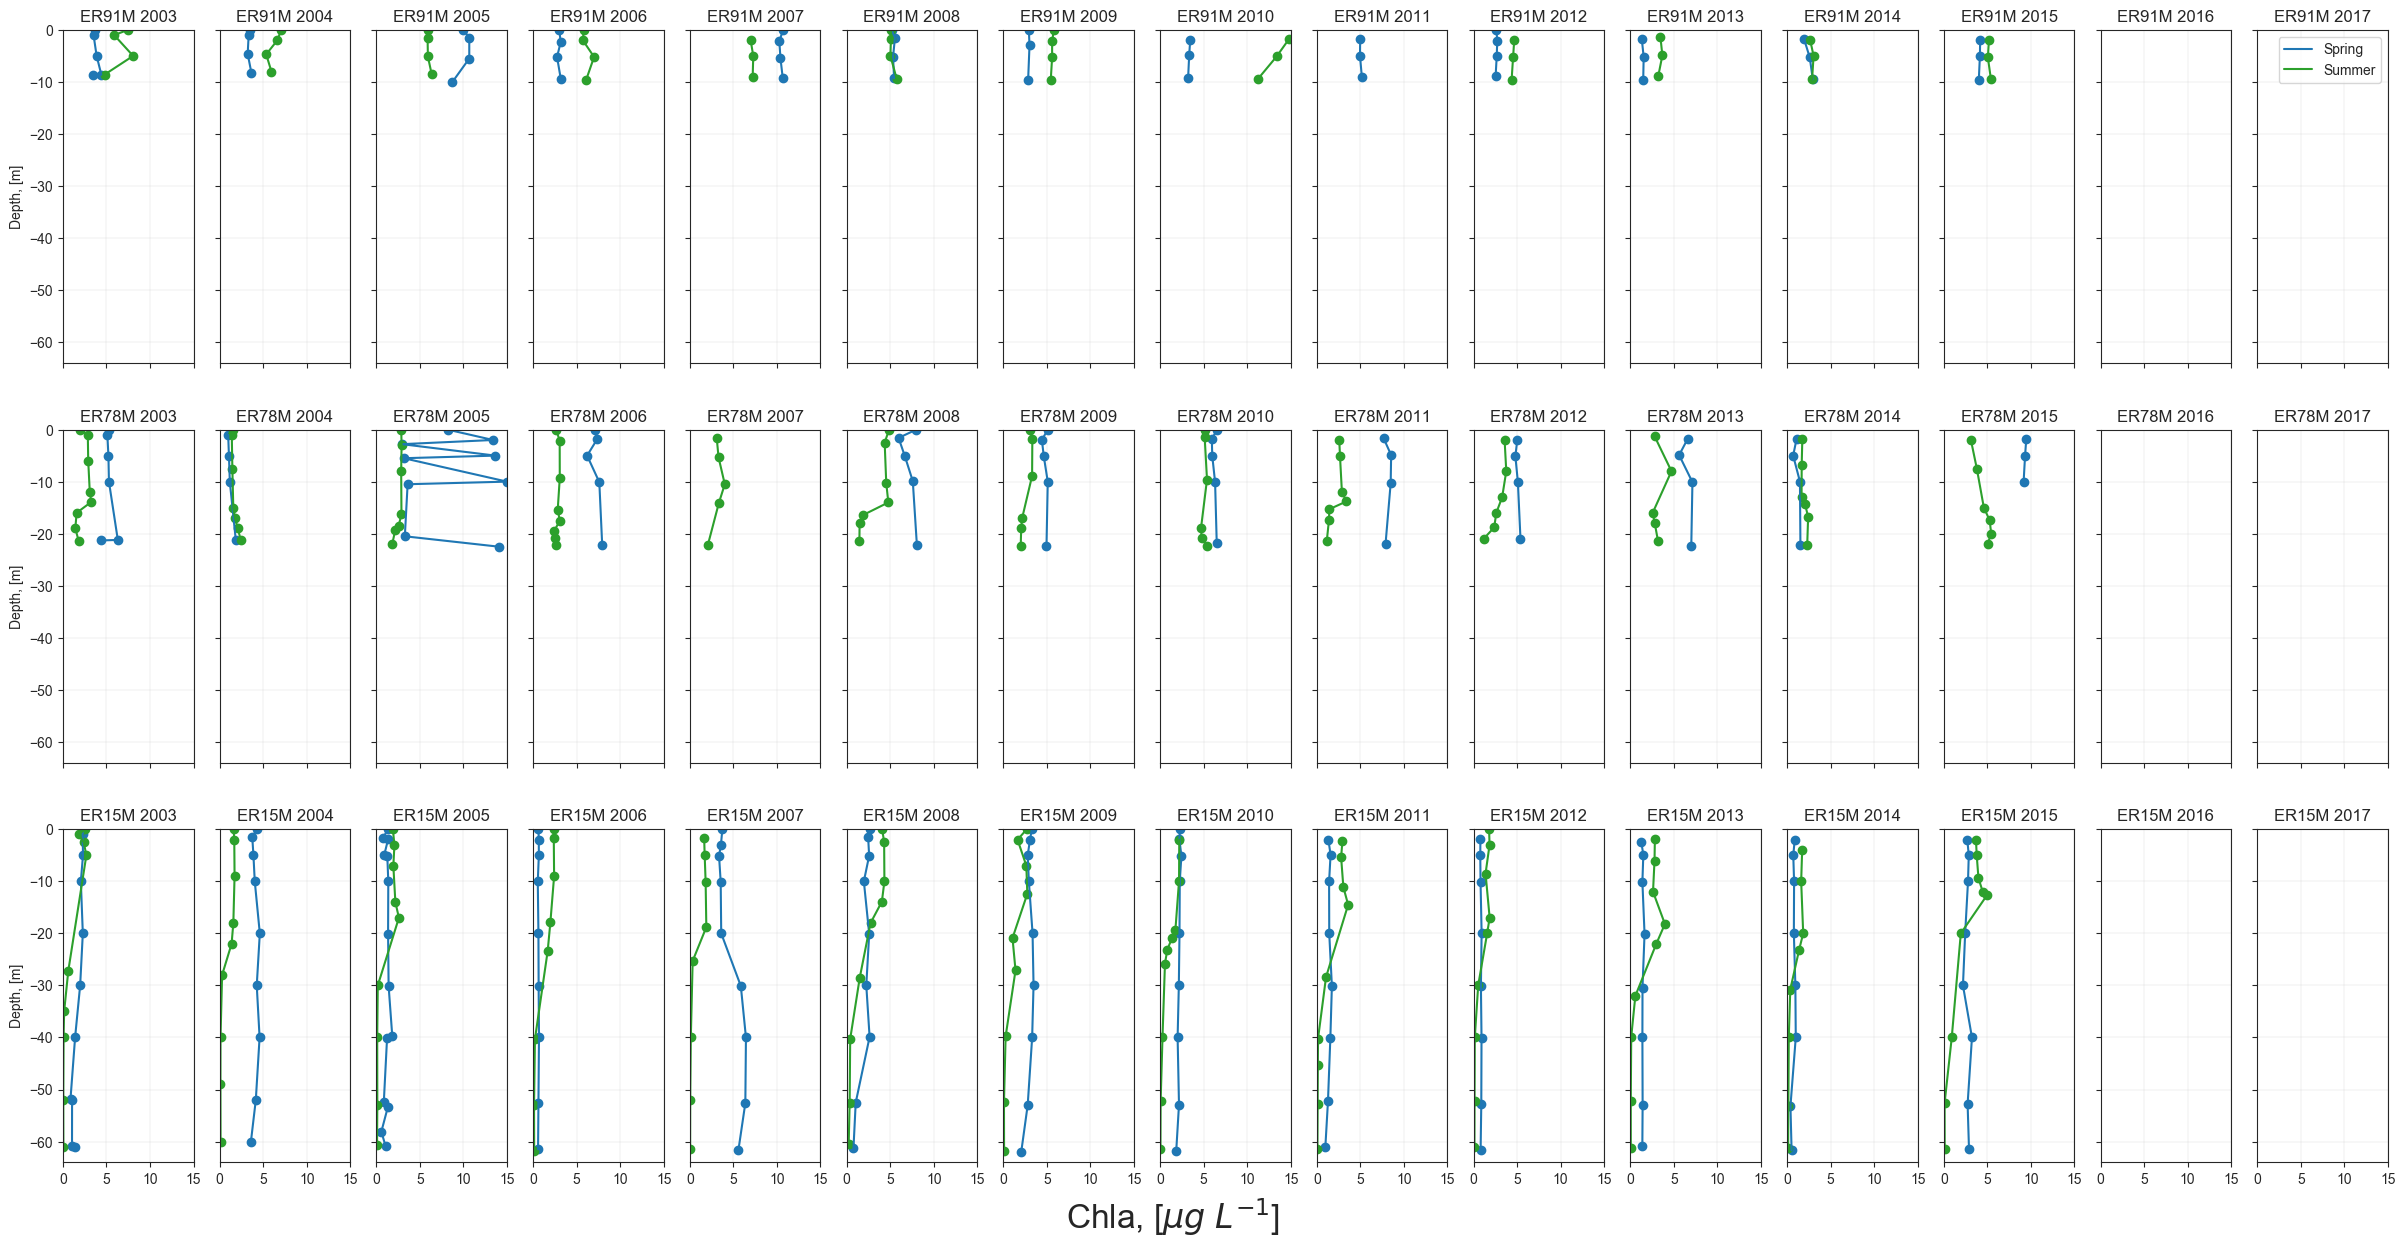

In [8]:
Chla = pd.read_csv('../../measurements/GLNPO/Mass Balance/Chla.csv')
Chla = Chla[Chla.QC_TYPE=='routine field sample']
Chla = Chla[Chla['STATION_ID'].isin(deep_stations)]
Chla = Chla[Chla['STATION_ID'].isin(deep_stations)]
Chla = Chla[Chla['SEASON'].isin(seasons)]
Chla['VALUE_1'] = pd.to_numeric(Chla['VALUE_1'], errors='coerce')
# Chla = Chla[Chla['VALUE_1']>50]
Chla = Chla.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = Chla[(Chla['STATION_ID']==st) & 
                      (Chla['YEAR']==y) &
                    (Chla['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].set_xlim(0,15)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Chla, [$\mu g$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('Mass Balance/GLENDA/Chla_ugL.pdf')

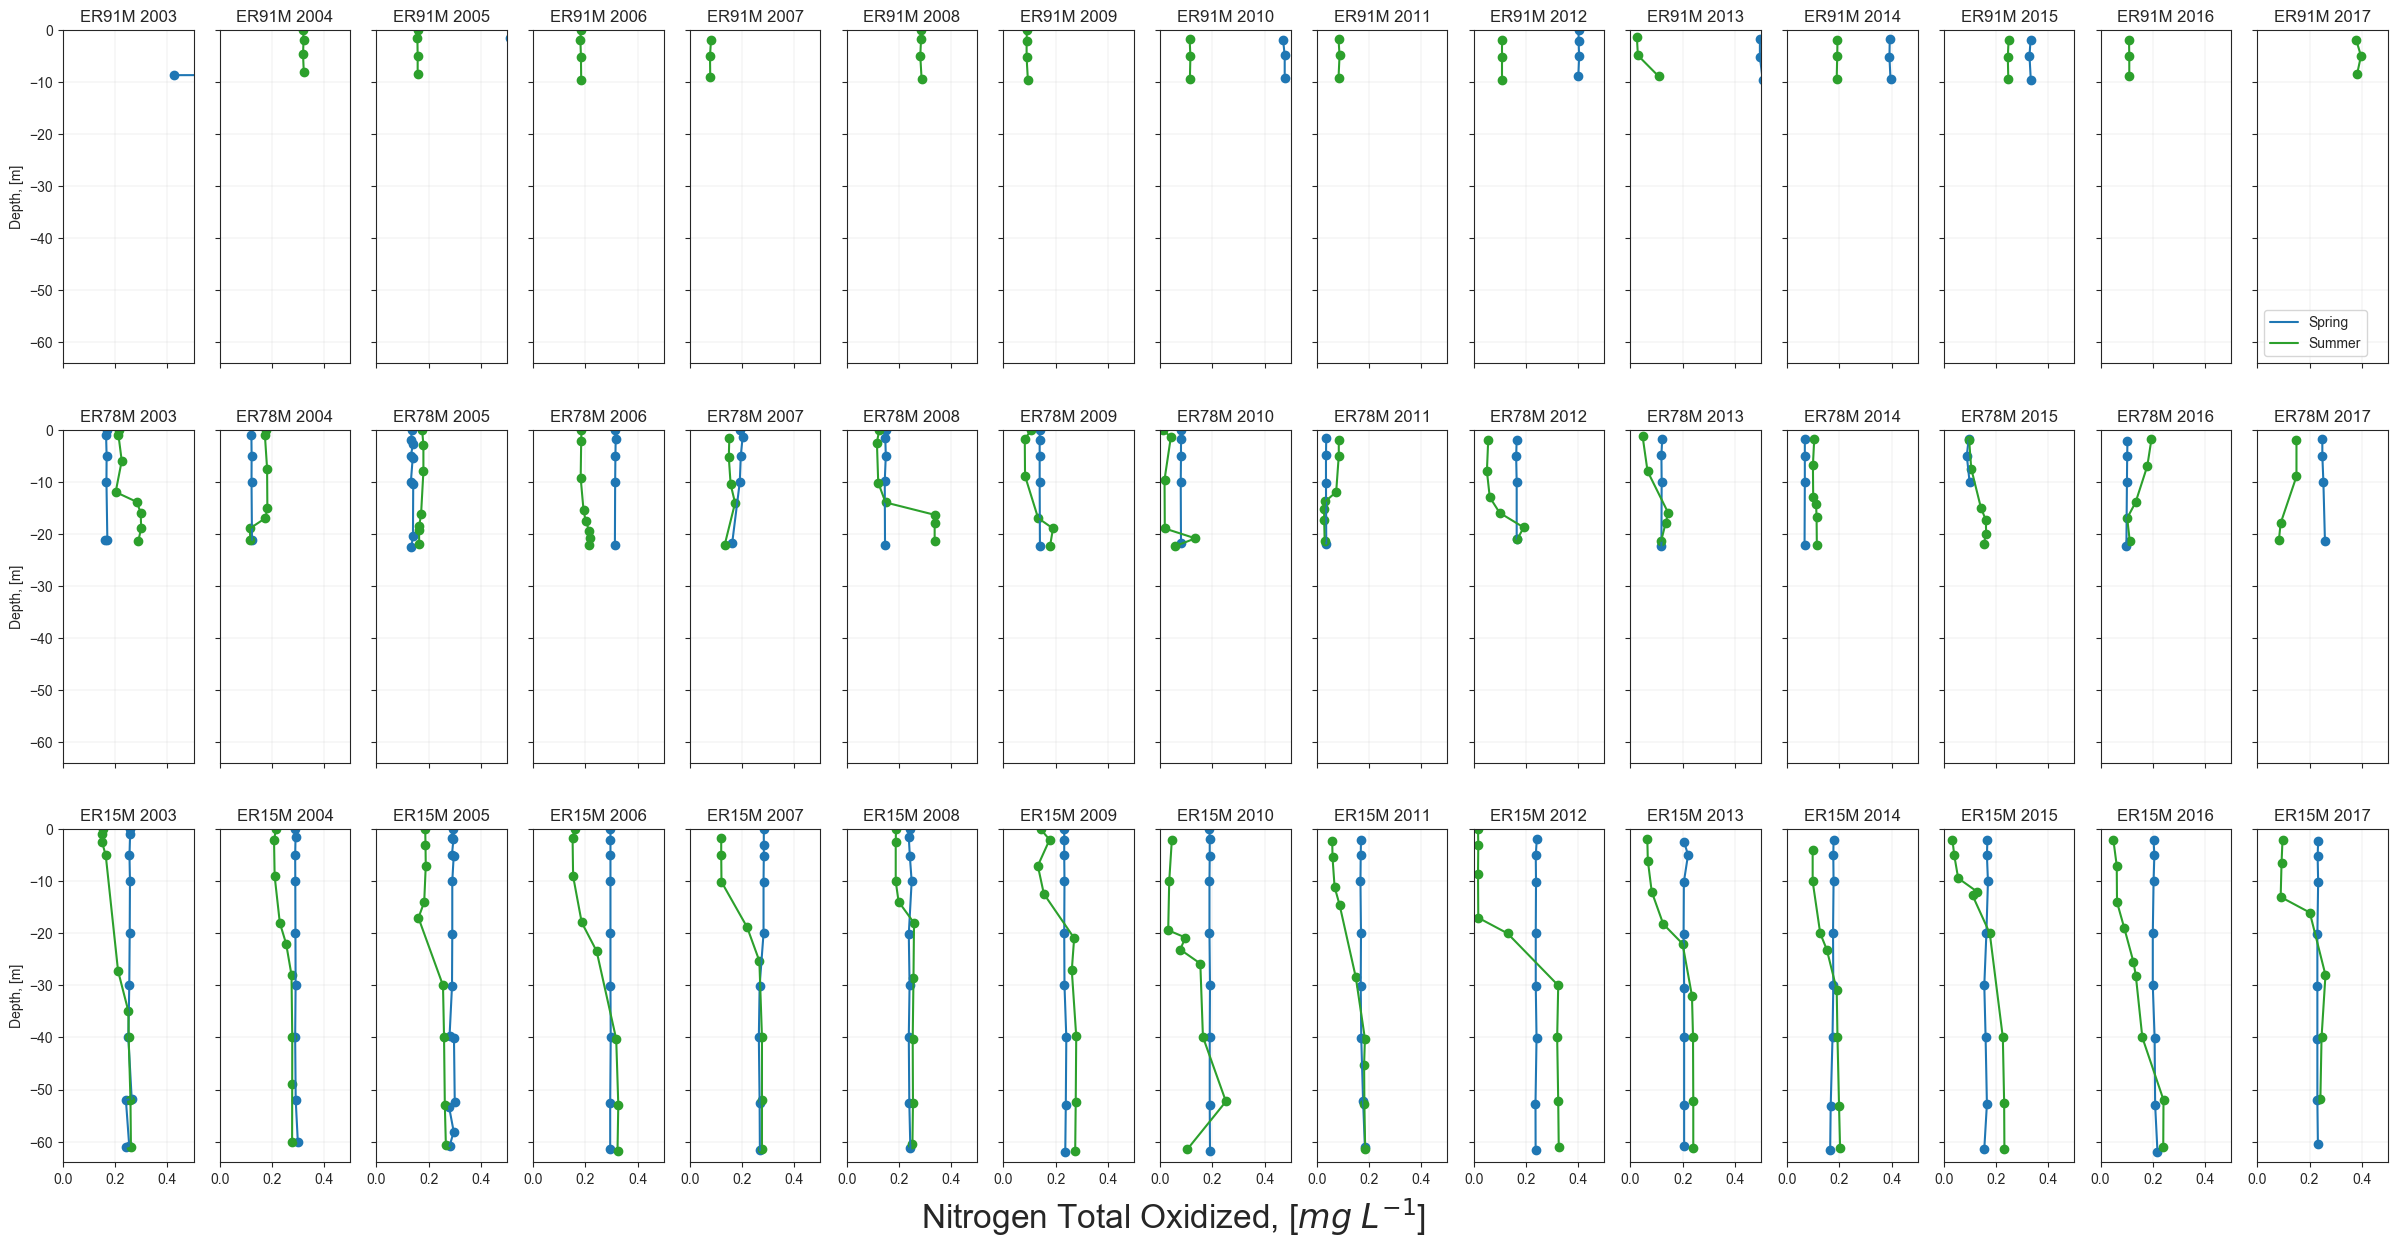

In [16]:
Ntot_oxidized = pd.read_csv('../../measurements/GLNPO/Mass Balance/Ntot_oxidized.csv')
Ntot_oxidized = Ntot_oxidized[Ntot_oxidized.QC_TYPE=='routine field sample']
Ntot_oxidized = Ntot_oxidized[Ntot_oxidized['STATION_ID'].isin(deep_stations)]
Ntot_oxidized = Ntot_oxidized[Ntot_oxidized['STATION_ID'].isin(deep_stations)]
Ntot_oxidized = Ntot_oxidized[Ntot_oxidized['SEASON'].isin(seasons)]
Ntot_oxidized['VALUE_1'] = pd.to_numeric(Ntot_oxidized['VALUE_1'], errors='coerce')
# Ntot_oxidized = Ntot_oxidized[Ntot_oxidized['VALUE_1']>50]
Ntot_oxidized = Ntot_oxidized.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = Ntot_oxidized[(Ntot_oxidized['STATION_ID']==st) & 
                      (Ntot_oxidized['YEAR']==y) &
                    (Ntot_oxidized['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].set_xlim(0,0.5)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Nitrogen Total Oxidized, [$m g$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('Ntot_oxidized_ugL_0_05.pdf')

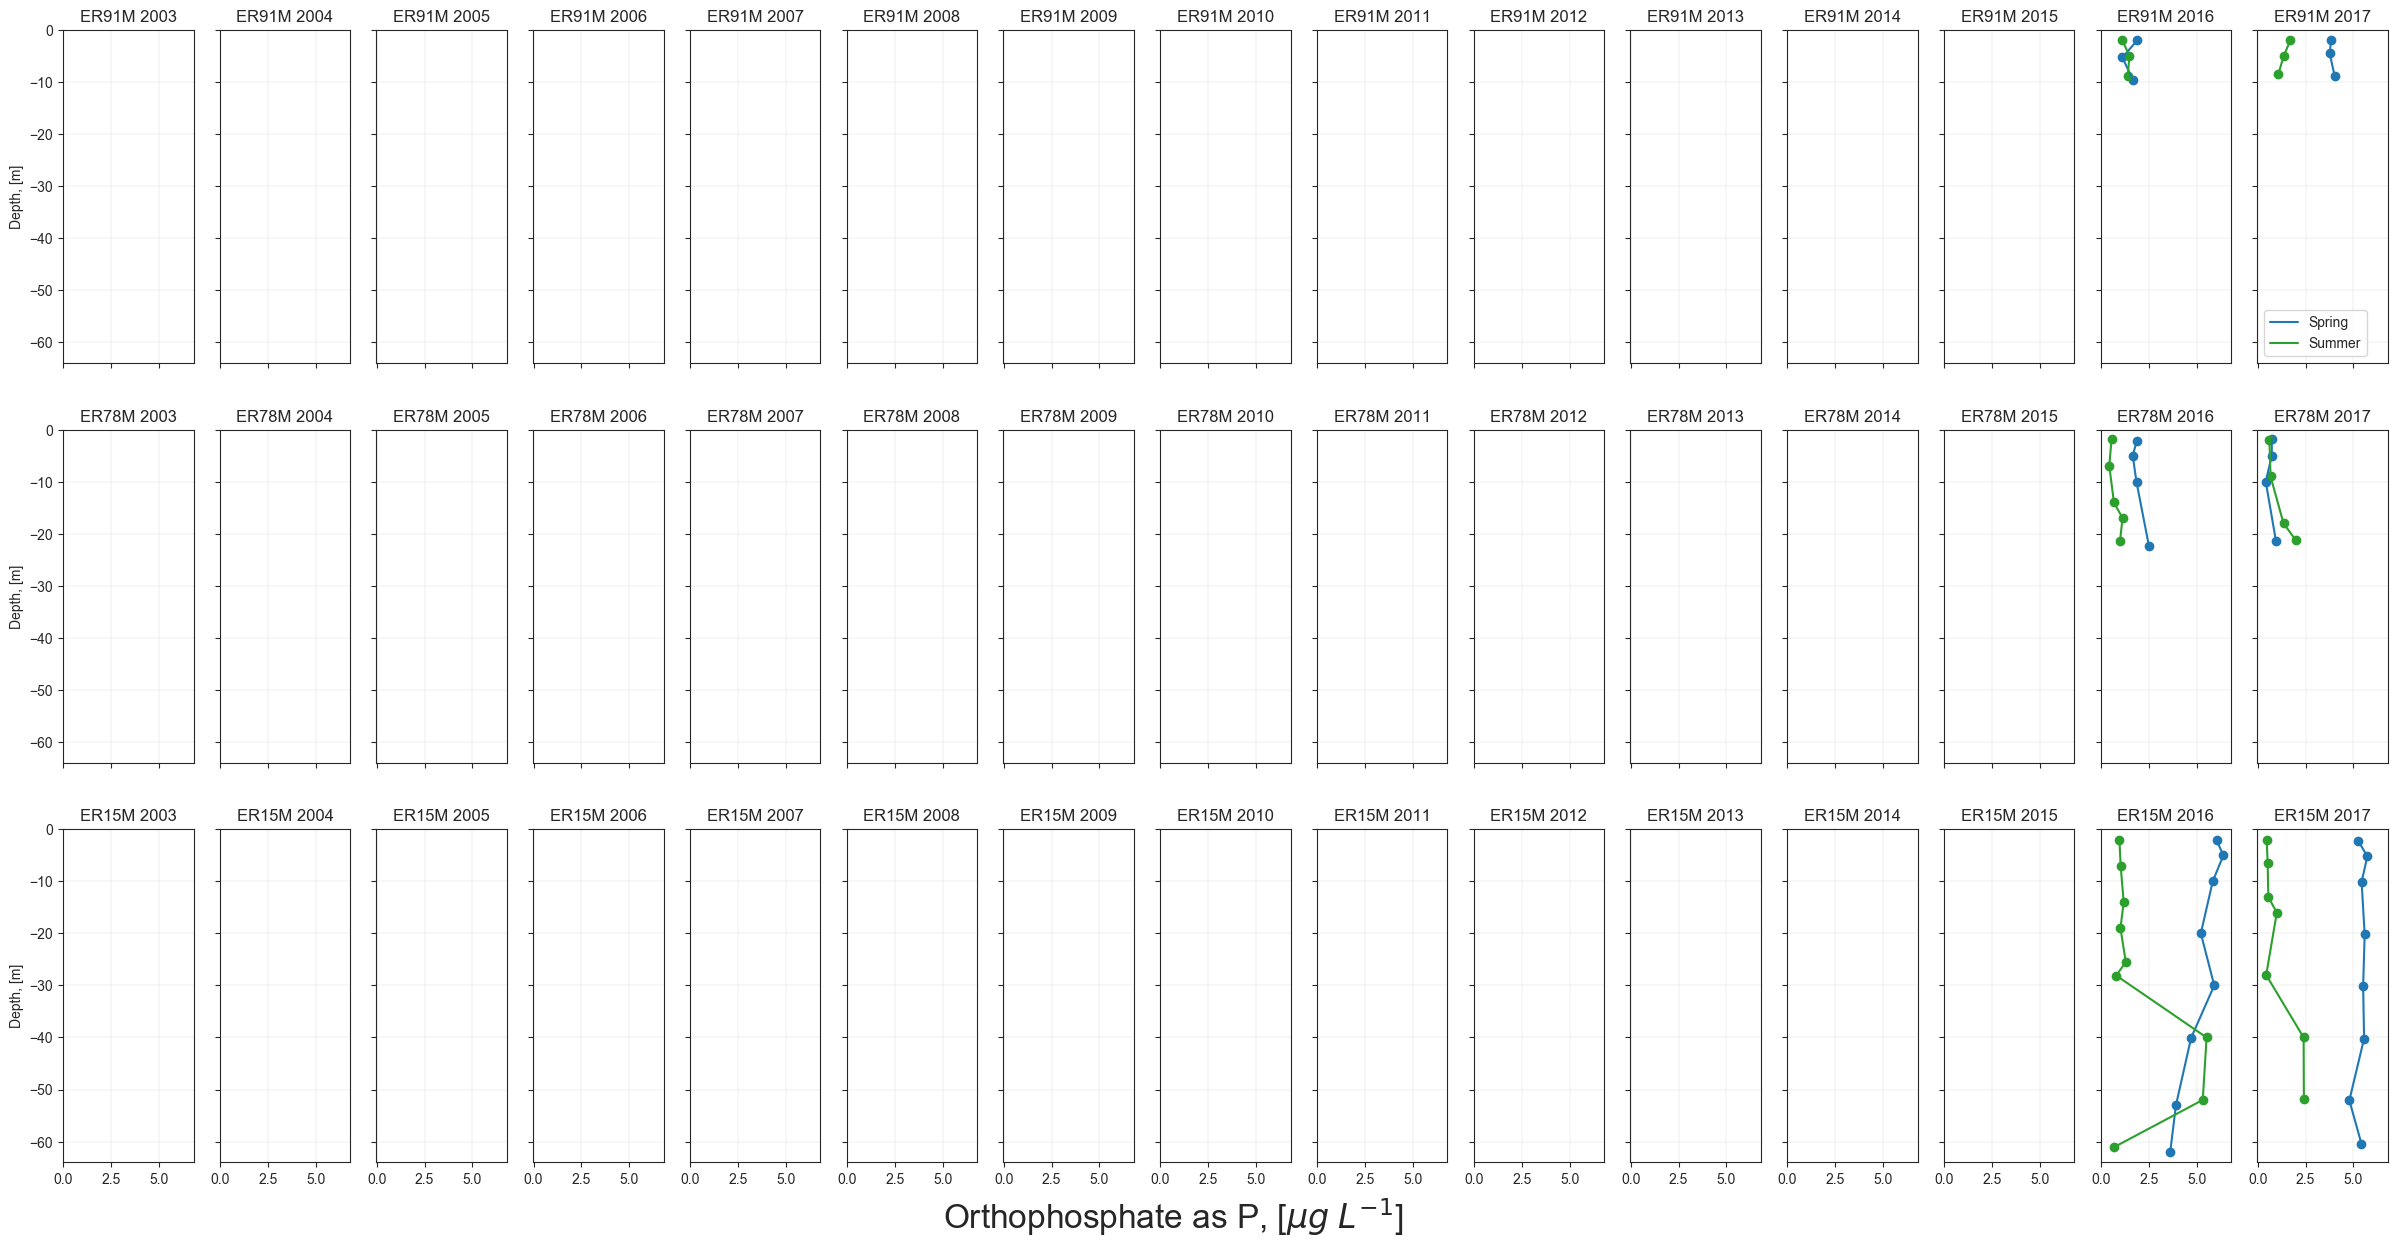

In [17]:
orthoP = pd.read_csv('../../measurements/GLNPO/Mass Balance/orthoP.csv')
orthoP = orthoP[orthoP.QC_TYPE=='routine field sample']
orthoP = orthoP[orthoP['STATION_ID'].isin(deep_stations)]
orthoP = orthoP[orthoP['STATION_ID'].isin(deep_stations)]
orthoP = orthoP[orthoP['SEASON'].isin(seasons)]
orthoP['VALUE_1'] = pd.to_numeric(orthoP['VALUE_1'], errors='coerce')
# orthoP = orthoP[orthoP['VALUE_1']>50]
orthoP = orthoP.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = orthoP[(orthoP['STATION_ID']==st) & 
                      (orthoP['YEAR']==y) &
                    (orthoP['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
#             axes[i][j].set_xlim(0,0.5)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Orthophosphate as P, [$\mu g$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('orthoP_ugL.pdf')

Text(8.5,-0.2,'Silica, Dissolved as Si, [$mg$ $L^{-1}$]')

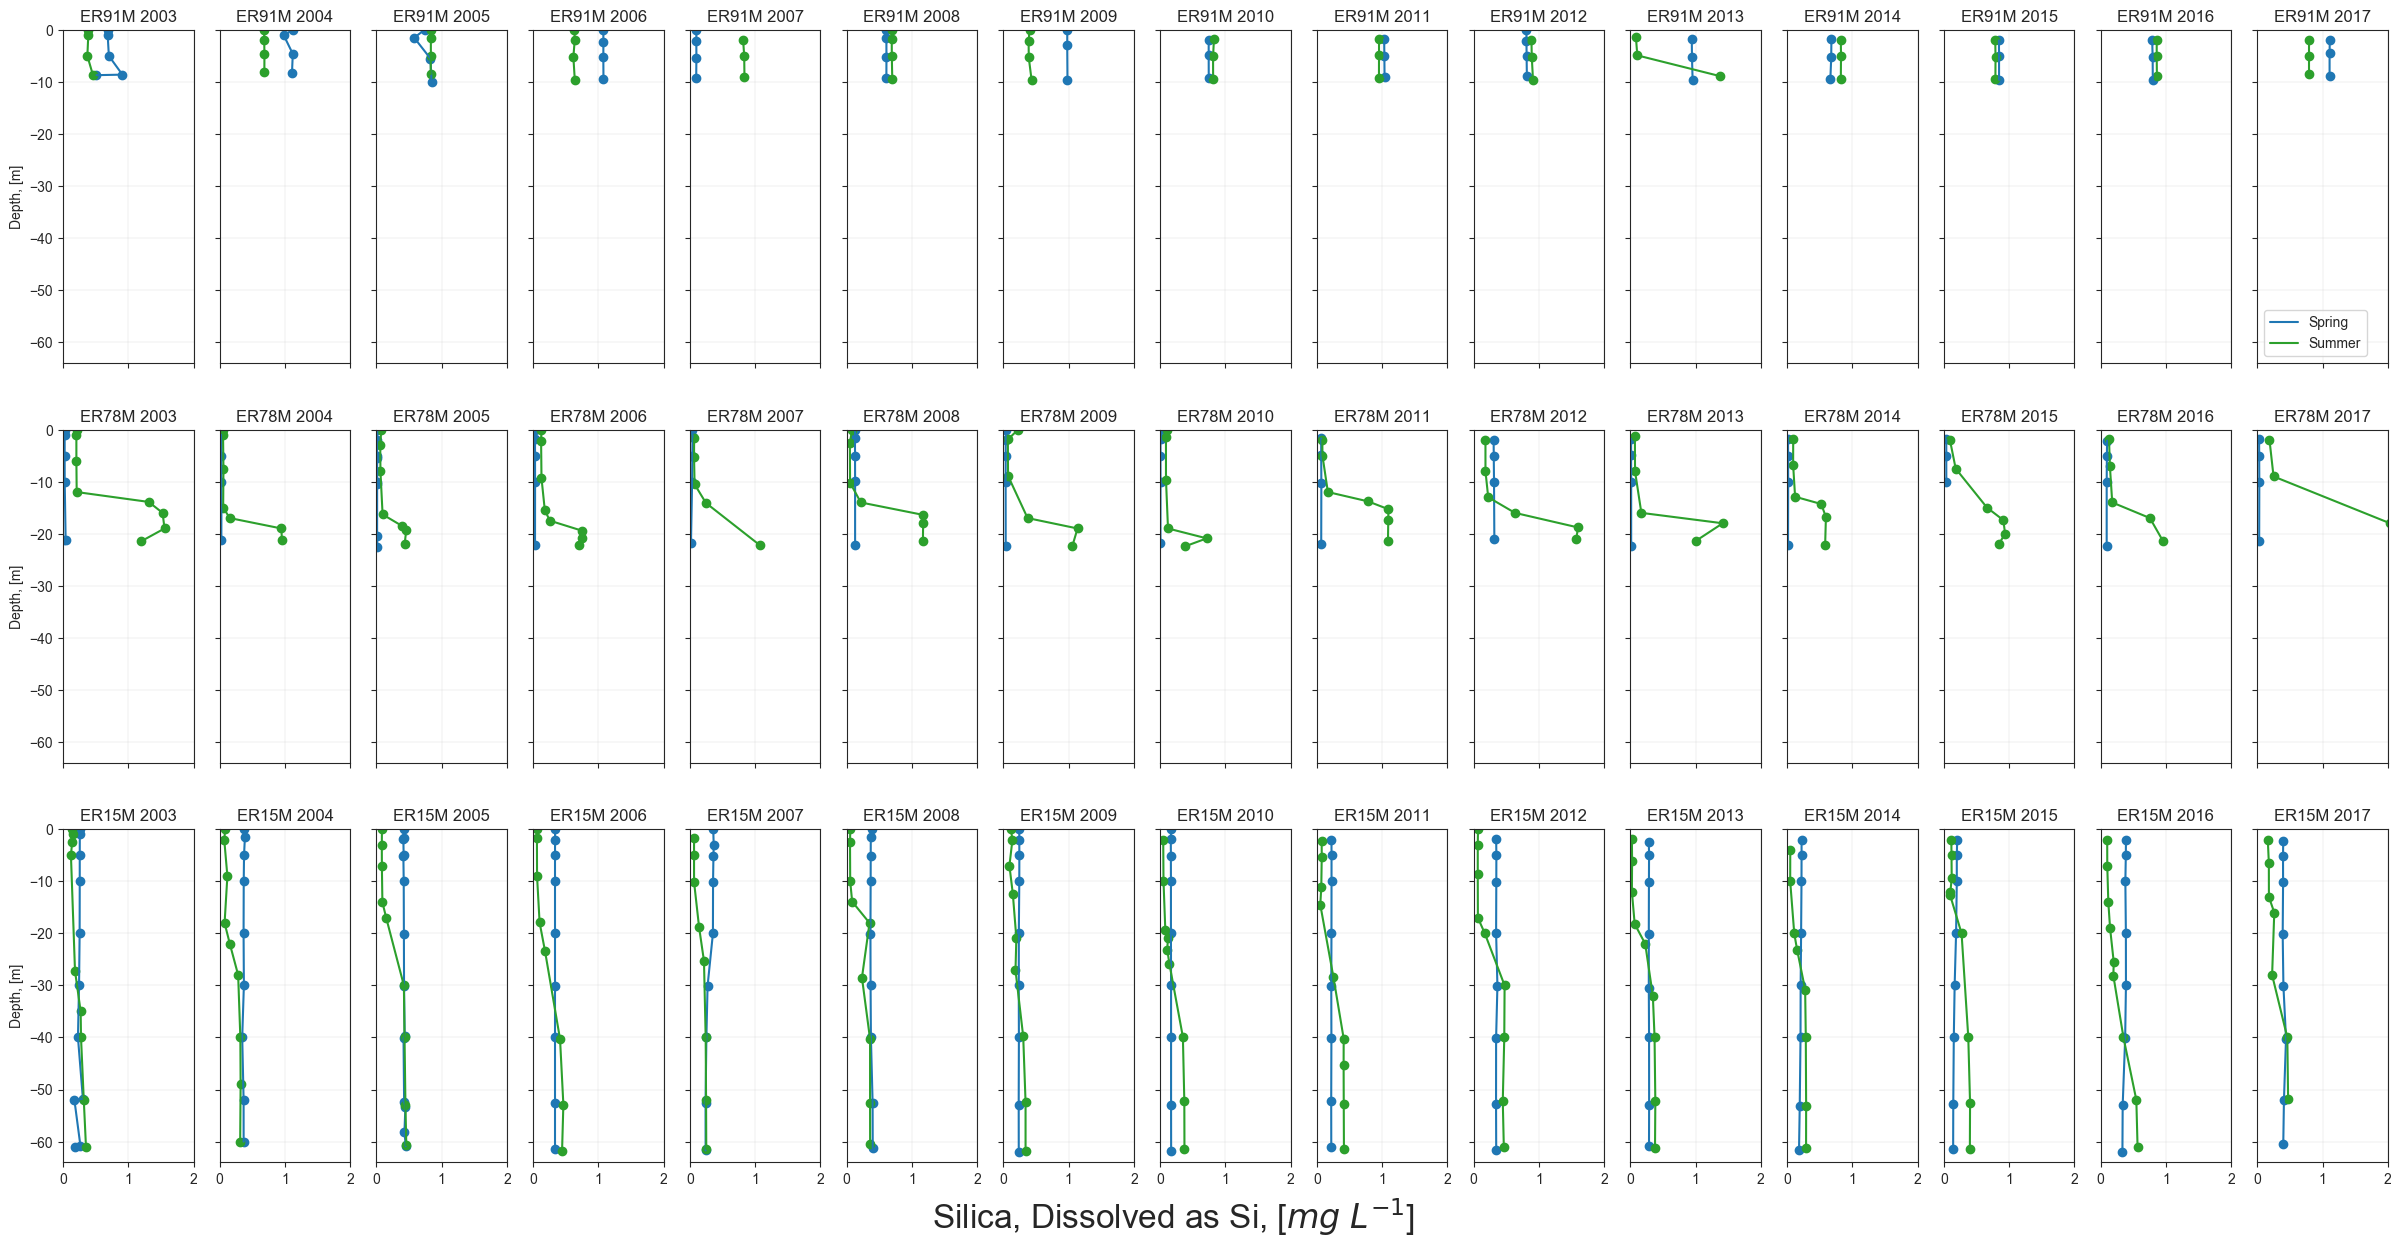

In [18]:
SilicaDissAsSi = pd.read_csv('../../measurements/GLNPO/Mass Balance/SilicaDissAsSi.csv')
SilicaDissAsSi = SilicaDissAsSi[SilicaDissAsSi.QC_TYPE=='routine field sample']
SilicaDissAsSi = SilicaDissAsSi[SilicaDissAsSi['STATION_ID'].isin(deep_stations)]
SilicaDissAsSi = SilicaDissAsSi[SilicaDissAsSi['STATION_ID'].isin(deep_stations)]
SilicaDissAsSi = SilicaDissAsSi[SilicaDissAsSi['SEASON'].isin(seasons)]
SilicaDissAsSi['VALUE_1'] = pd.to_numeric(SilicaDissAsSi['VALUE_1'], errors='coerce')
# SilicaDissAsSi = SilicaDissAsSi[SilicaDissAsSi['VALUE_1']>50]
SilicaDissAsSi = SilicaDissAsSi.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = SilicaDissAsSi[(SilicaDissAsSi['STATION_ID']==st) & 
                      (SilicaDissAsSi['YEAR']==y) &
                    (SilicaDissAsSi['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].set_xlim(0,2)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Silica, Dissolved as Si, [$mg$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('SilicaDissAsSi_ugL.pdf')

Text(8.5,-0.2,'Silica, Total as Si, [$mg$ $L^{-1}$]')

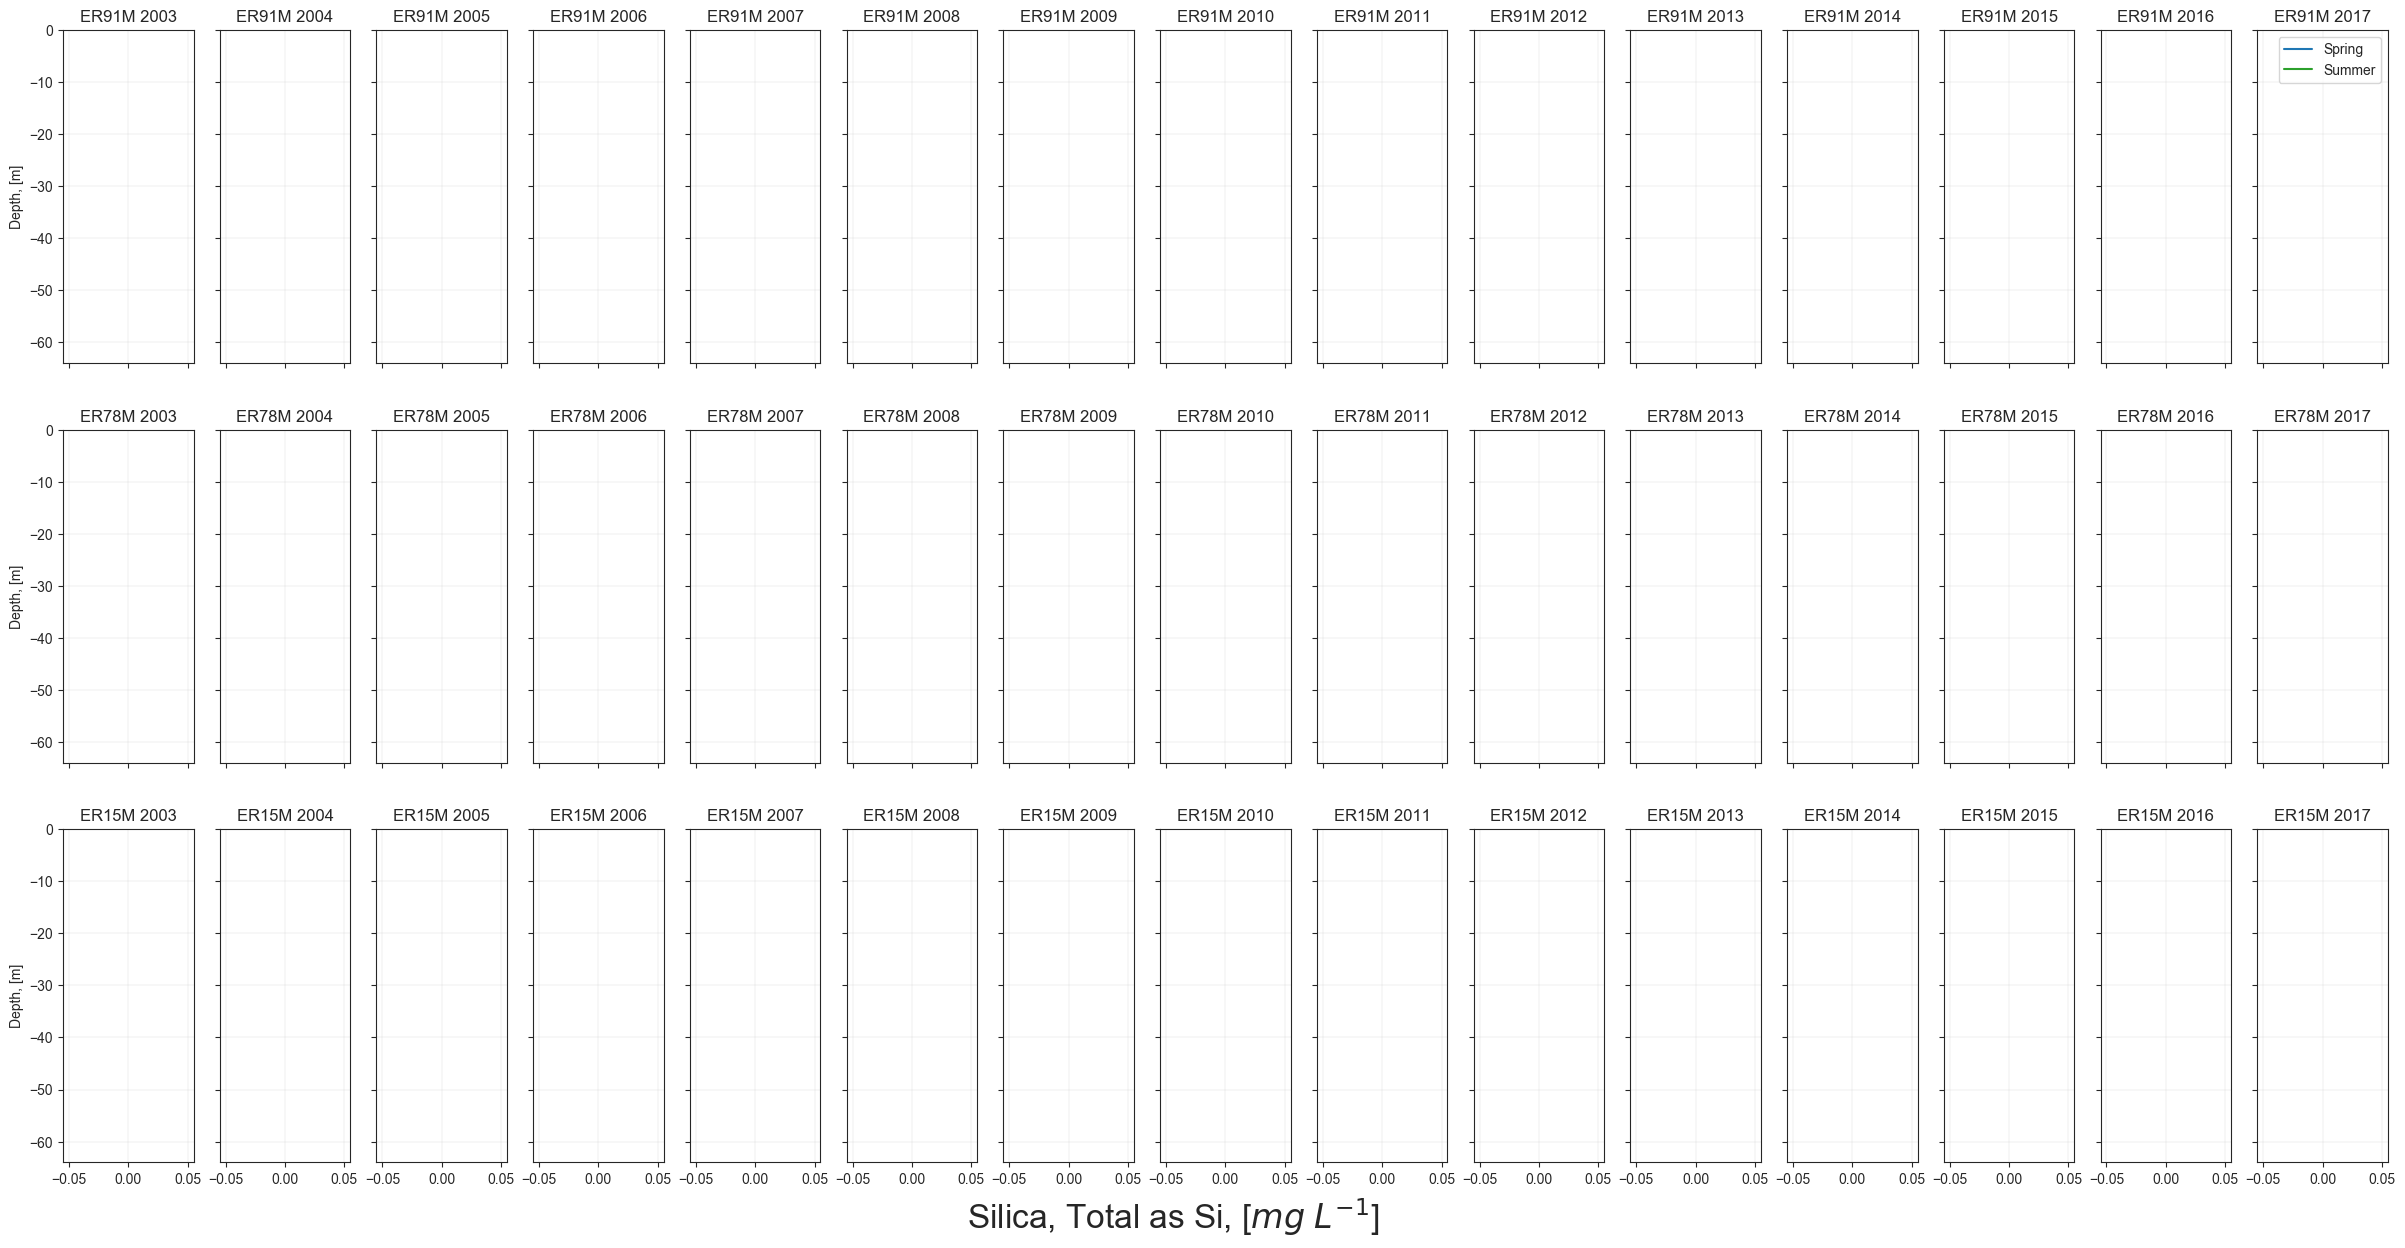

In [19]:
SiTotal = pd.read_csv('../../measurements/GLNPO/Mass Balance/SiTotal.csv')
SiTotal = SiTotal[SiTotal.QC_TYPE=='routine field sample']
SiTotal = SiTotal[SiTotal['STATION_ID'].isin(deep_stations)]
SiTotal = SiTotal[SiTotal['STATION_ID'].isin(deep_stations)]
SiTotal = SiTotal[SiTotal['SEASON'].isin(seasons)]
SiTotal['VALUE_1'] = pd.to_numeric(SiTotal['VALUE_1'], errors='coerce')
# SiTotal = SiTotal[SiTotal['VALUE_1']>50]
SiTotal = SiTotal.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = SiTotal[(SiTotal['STATION_ID']==st) & 
                      (SiTotal['YEAR']==y) &
                    (SiTotal['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
#             axes[i][j].set_xlim(0,2)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Silica, Total as Si, [$mg$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('SiTotal_ugL.pdf')

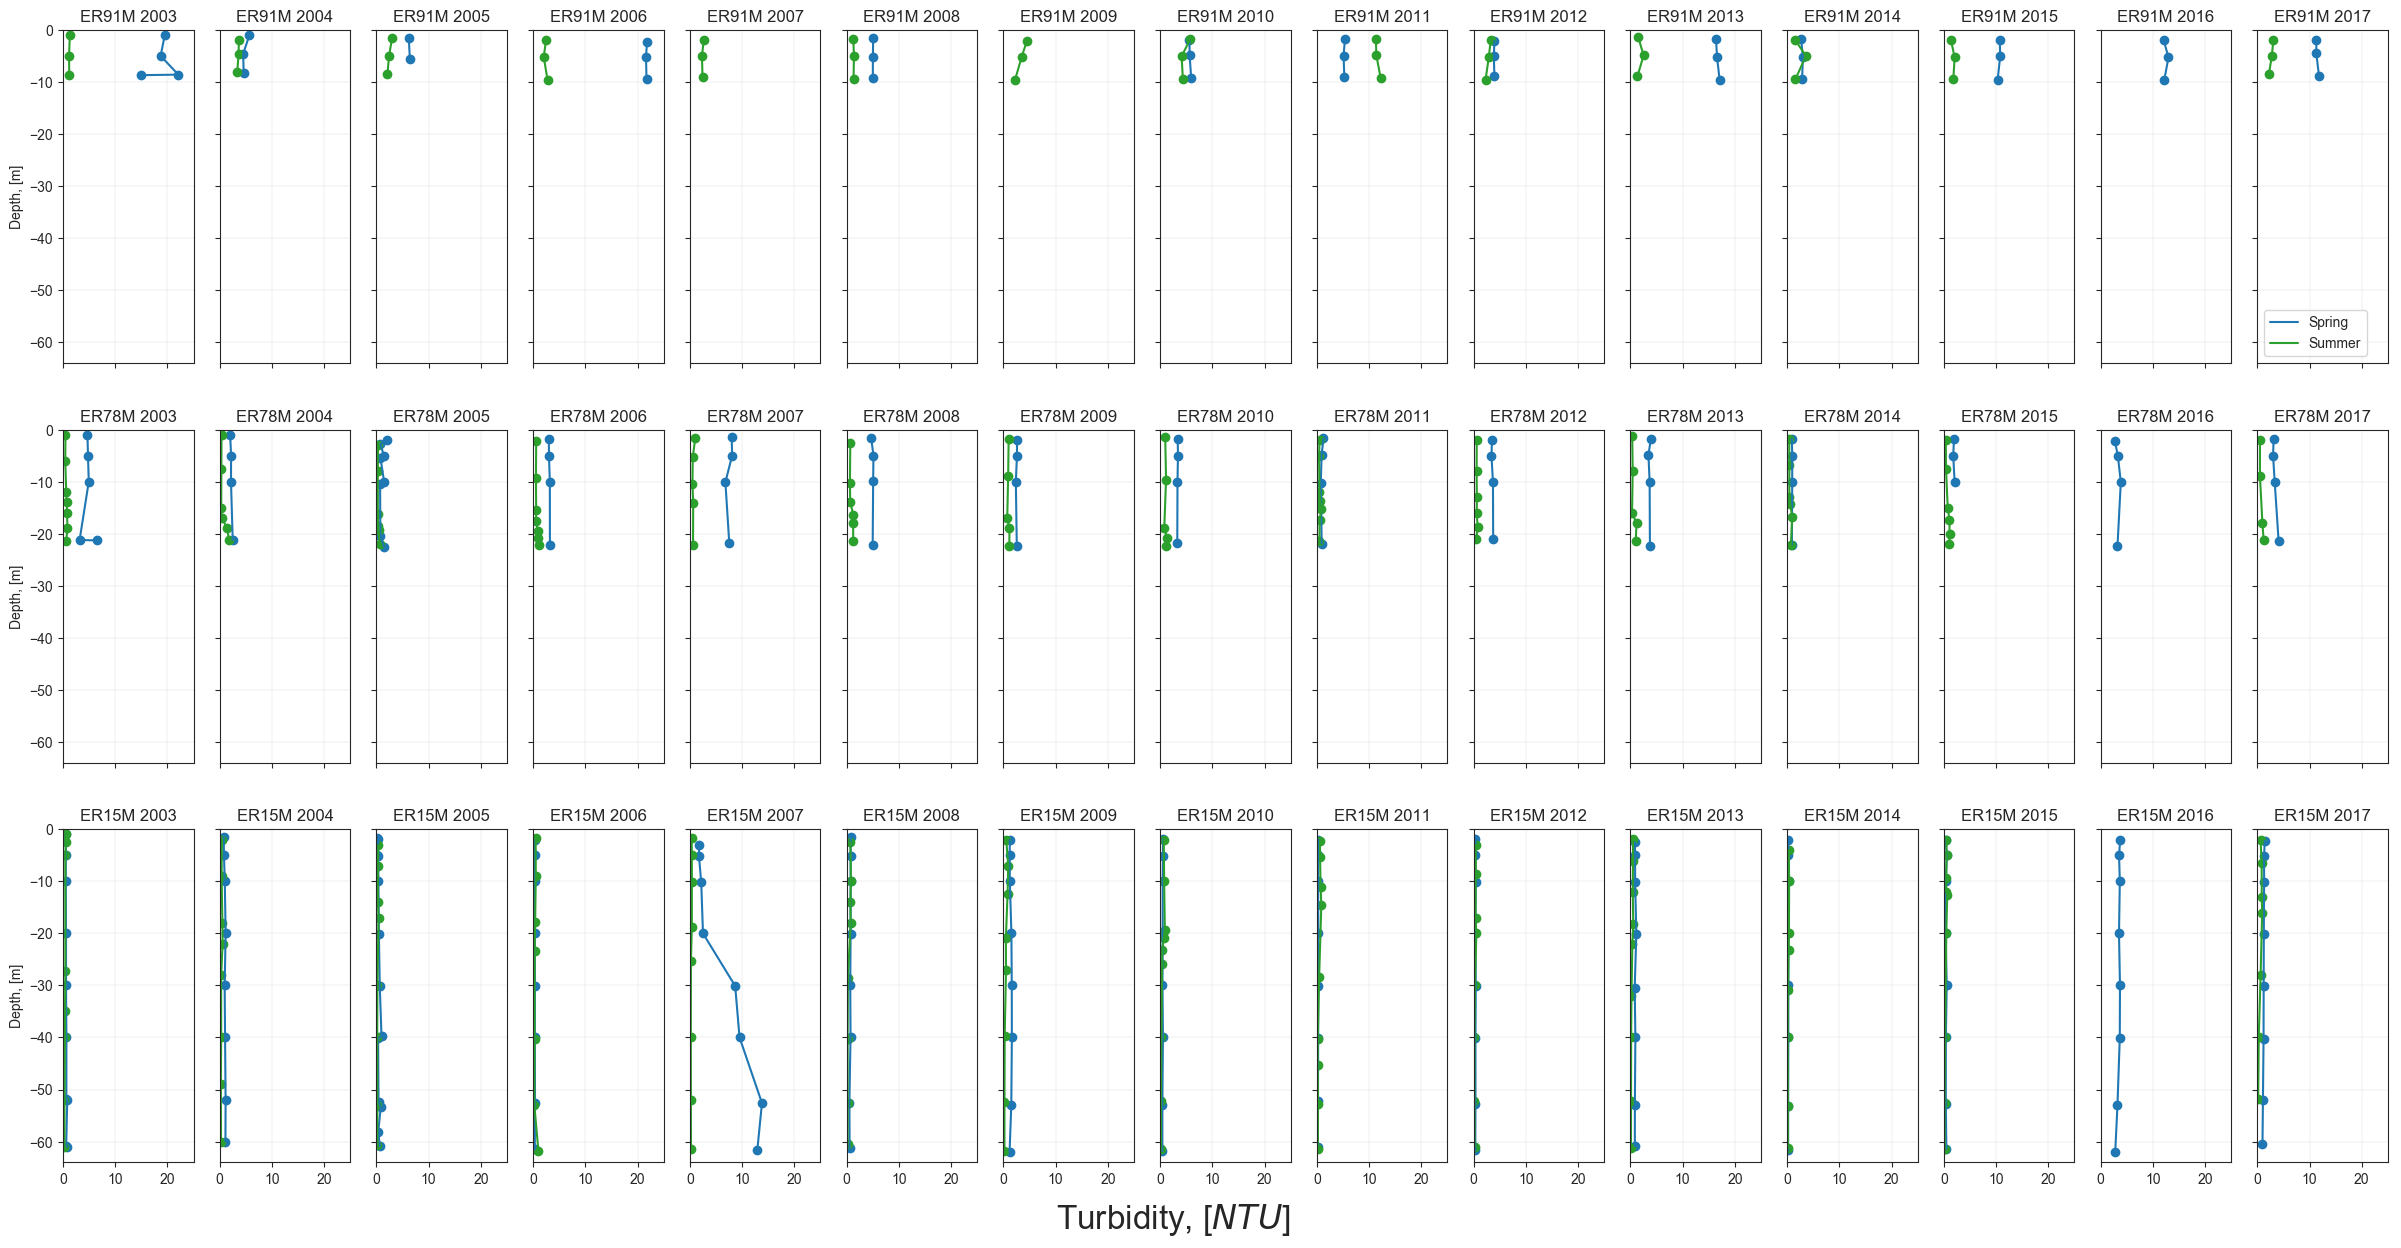

In [20]:
Turbidity = pd.read_csv('../../measurements/GLNPO/Mass Balance/Turbidity.csv')
Turbidity = Turbidity[Turbidity.QC_TYPE=='routine field sample']
Turbidity = Turbidity[Turbidity['STATION_ID'].isin(deep_stations)]
Turbidity = Turbidity[Turbidity['STATION_ID'].isin(deep_stations)]
Turbidity = Turbidity[Turbidity['SEASON'].isin(seasons)]
Turbidity['VALUE_1'] = pd.to_numeric(Turbidity['VALUE_1'], errors='coerce')
# Turbidity = Turbidity[Turbidity['VALUE_1']>50]
Turbidity = Turbidity.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = Turbidity[(Turbidity['STATION_ID']==st) & 
                      (Turbidity['YEAR']==y) &
                    (Turbidity['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].set_xlim(0,25)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Turbidity, [$NTU$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('Mass Balance/GLENDA/Turbidity_NTU.pdf')

Text(8.5,-0.2,'Conductivity, [$umho$ $cm^{-1}$]')

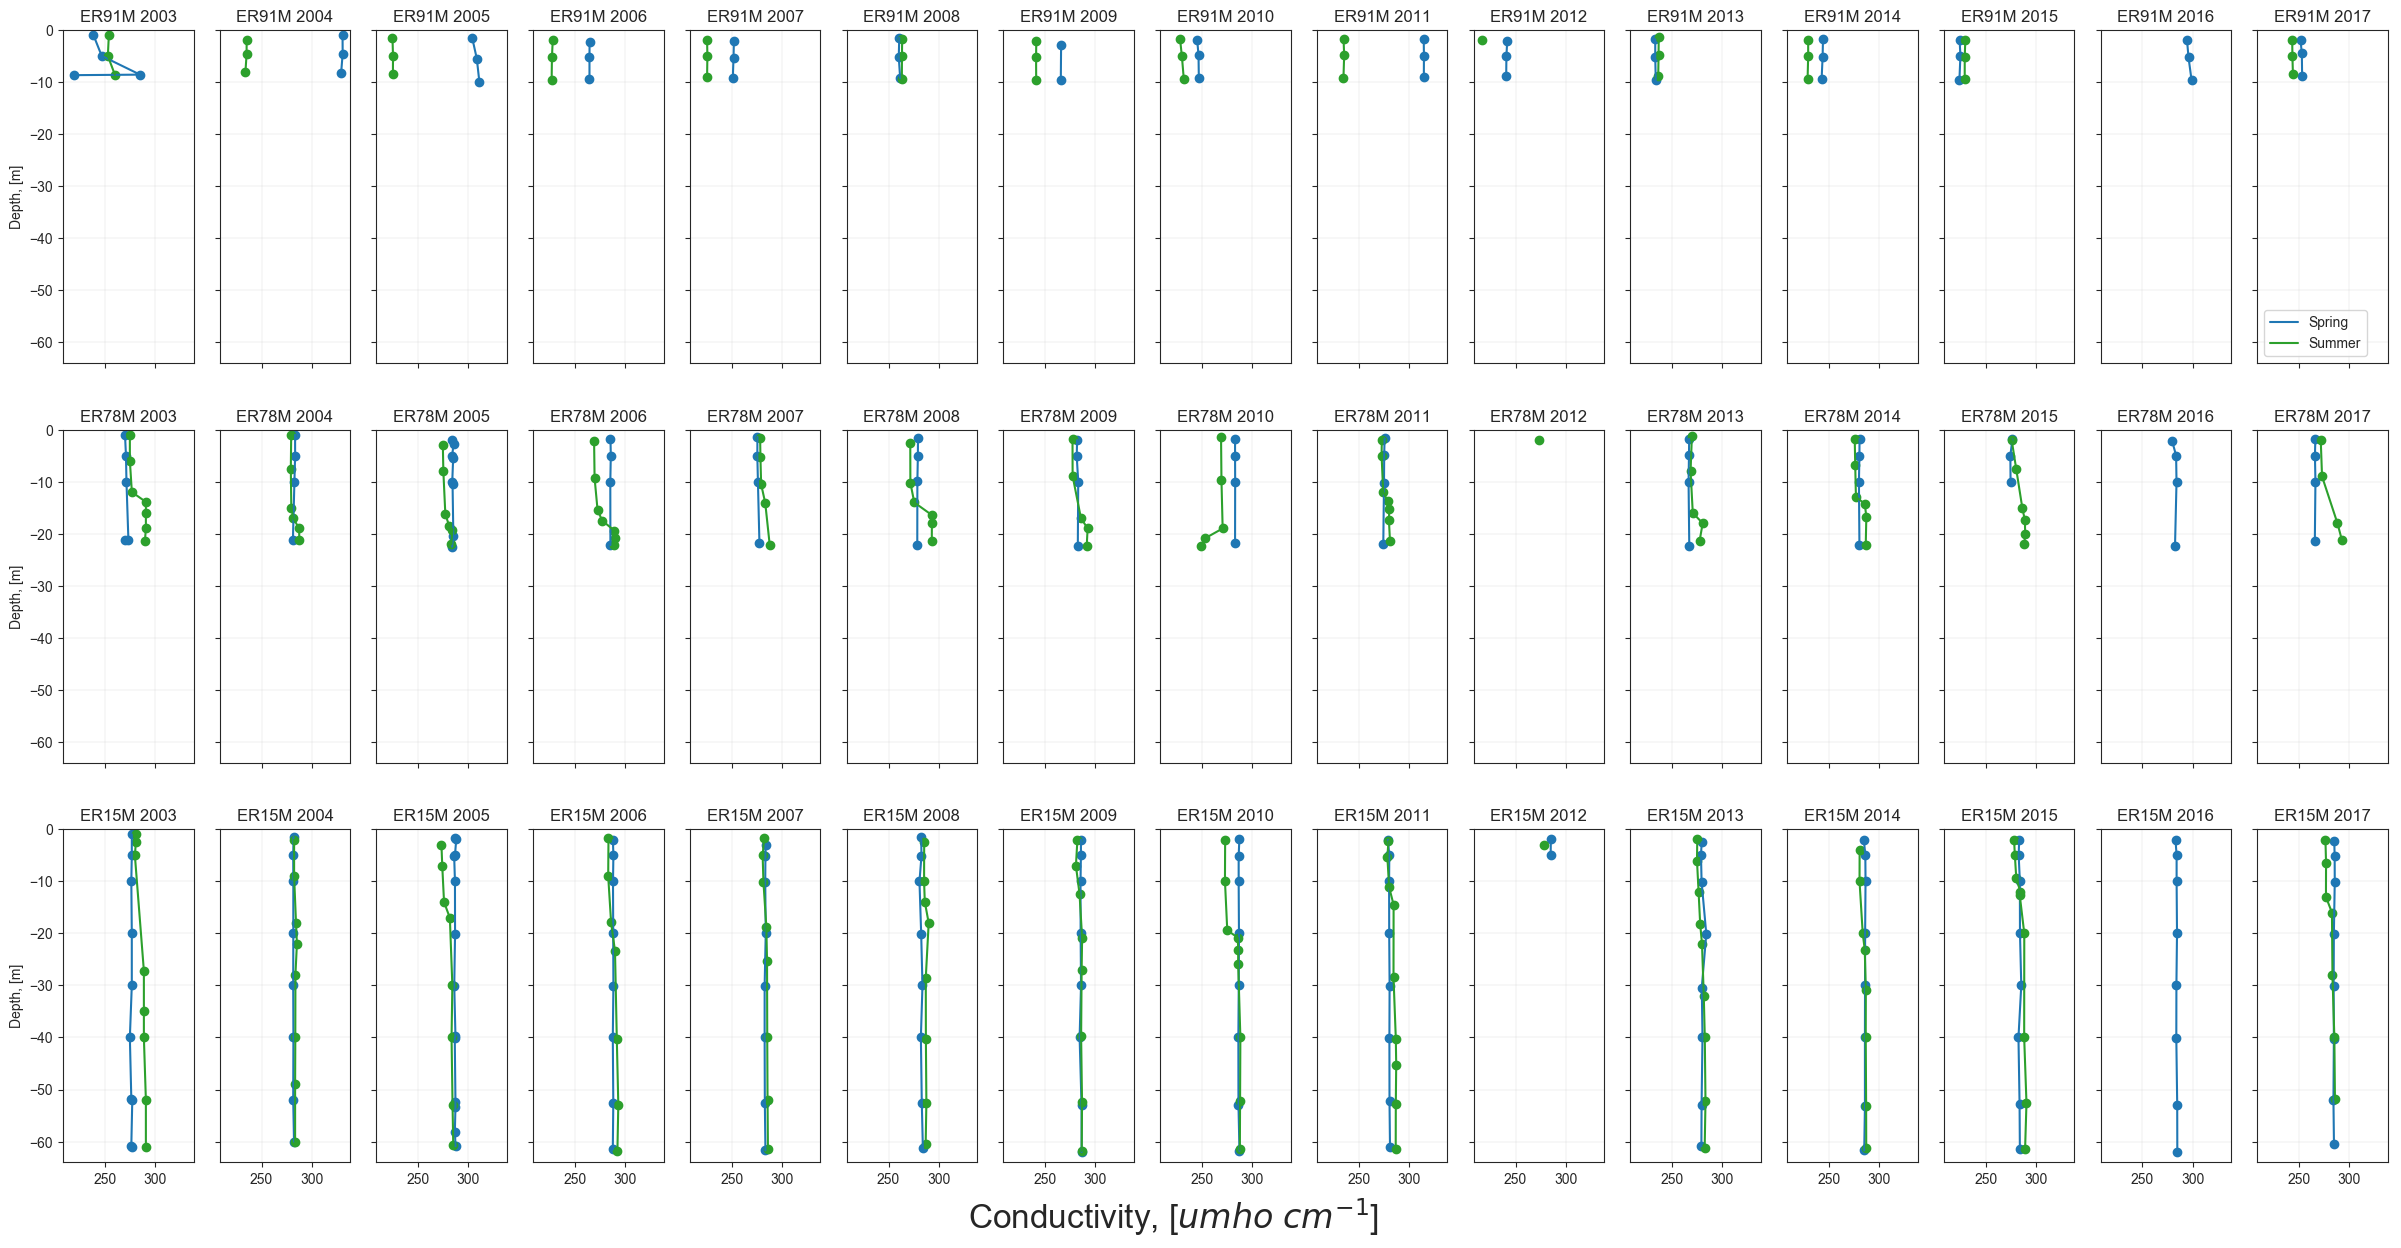

In [21]:
Conductivity = pd.read_csv('../../measurements/GLNPO/Mass Balance/Conductivity.csv')
Conductivity = Conductivity[Conductivity.QC_TYPE=='routine field sample']
Conductivity = Conductivity[Conductivity['STATION_ID'].isin(deep_stations)]
Conductivity = Conductivity[Conductivity['STATION_ID'].isin(deep_stations)]
Conductivity = Conductivity[Conductivity['SEASON'].isin(seasons)]
Conductivity['VALUE_1'] = pd.to_numeric(Conductivity['VALUE_1'], errors='coerce')
# Conductivity = Conductivity[Conductivity['VALUE_1']>50]
Conductivity = Conductivity.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = Conductivity[(Conductivity['STATION_ID']==st) & 
                      (Conductivity['YEAR']==y) &
                    (Conductivity['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
#             axes[i][j].set_xlim(0,2)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Conductivity, [$umho$ $cm^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('Conductivity_umhocm.pdf')

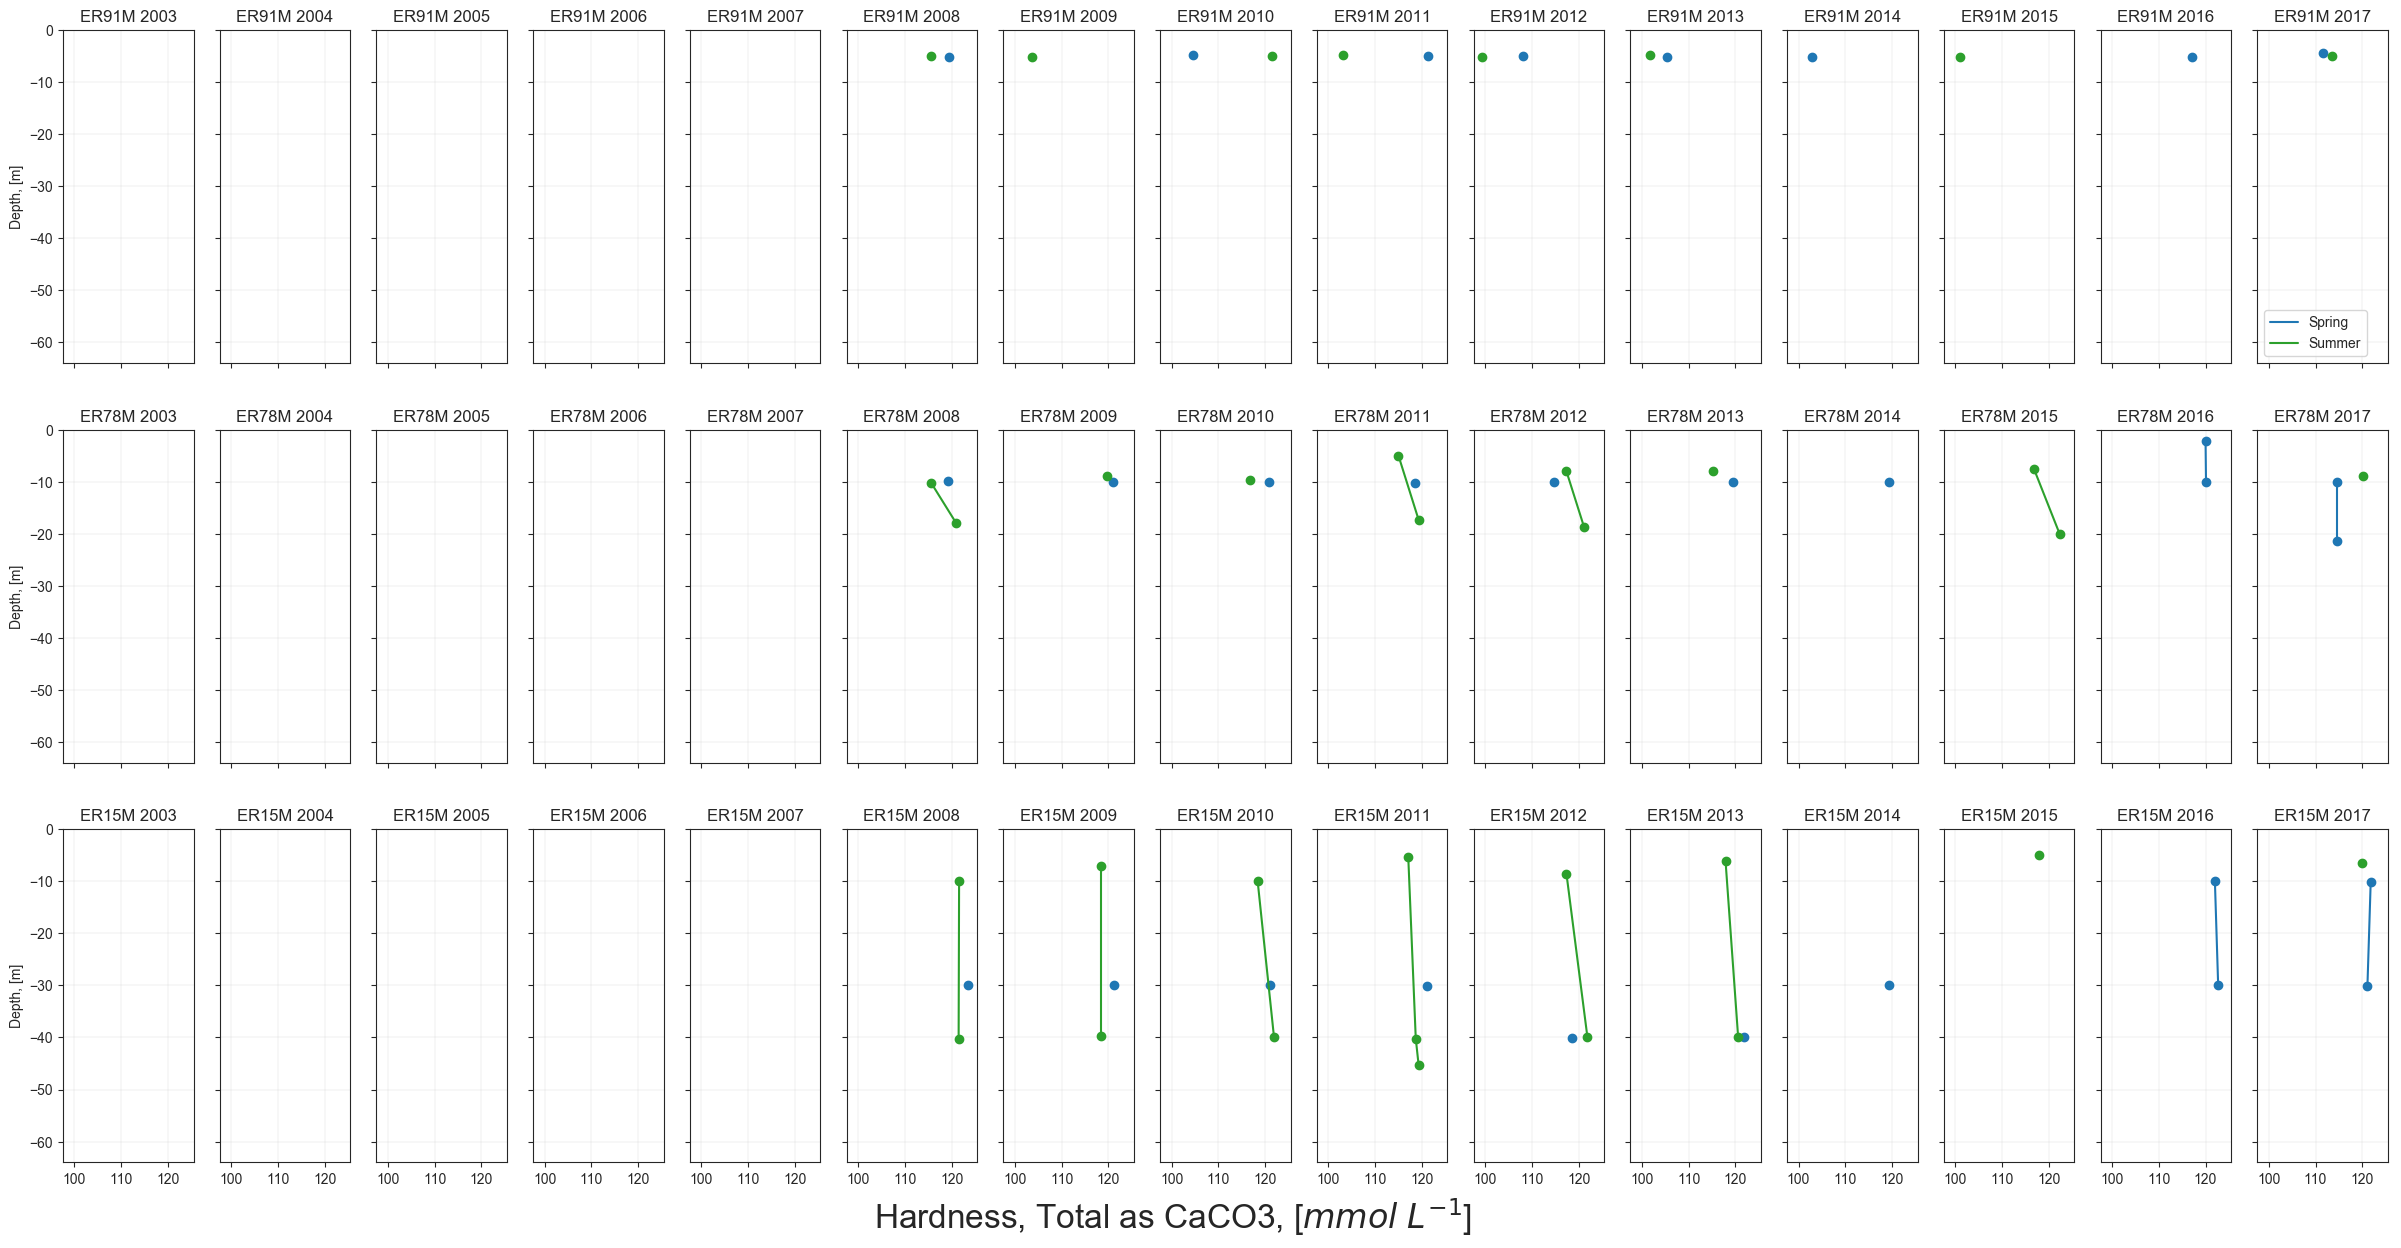

In [25]:
Hardness = pd.read_csv('../../measurements/GLNPO/Mass Balance/Hardness.csv')
Hardness = Hardness[Hardness.QC_TYPE=='routine field sample']
Hardness = Hardness[Hardness['STATION_ID'].isin(deep_stations)]
Hardness = Hardness[Hardness['STATION_ID'].isin(deep_stations)]
Hardness = Hardness[Hardness['SEASON'].isin(seasons)]
Hardness['VALUE_1'] = pd.to_numeric(Hardness['VALUE_1'], errors='coerce')
# Hardness = Hardness[Hardness['VALUE_1']>50]
Hardness = Hardness.groupby(['STATION_ID','YEAR','SEASON', 'SAMPLE_DEPTH_M']).mean()['VALUE_1'].reset_index()
f, axes = plt.subplots(3,15, figsize=(2*15,5*3), dpi=100, sharex=True, sharey=True)
for i, st in enumerate(deep_stations[::-1]):
    for j, y in enumerate(years):
        for k, s in enumerate(seasons):
            data = Hardness[(Hardness['STATION_ID']==st) & 
                      (Hardness['YEAR']==y) &
                    (Hardness['SEASON']==s)]
            if s=='Spring':
                clr=sns.color_palette().as_hex()[0]
            if s=='Summer':
                clr=sns.color_palette().as_hex()[2]
            axes[i][j].set_title(" ".join([st,str(y)]))
            axes[i][j].scatter(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
            axes[i][j].plot(data.VALUE_1, -data.SAMPLE_DEPTH_M, c=clr)
#             axes[i][j].set_xlim(0,2)
            axes[i][j].set_ylim(-64,0)
            axes[i][j].grid(lw=0.2)
axes[0][14].legend(['Spring', 'Summer'])
# axes[0][0].text(130,10, 'Chloride concnetrations, [mg/L]', fontsize=24)
axes[0][0].set_ylabel('Depth, [m]')
axes[1][0].set_ylabel('Depth, [m]')
axes[2][0].set_ylabel('Depth, [m]')
axes[2][0].text(8.5,-0.2, 'Hardness, Total as CaCO3, [$mmol$ $L^{-1}$]', fontsize=24, horizontalalignment='center', transform=axes[2][0].transAxes)
# f.savefig('Mass Balance/GLENDA/Hardness.pdf')